In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Libraries

In [ ]:
import numpy as np
from numpy import genfromtxt
import csv
from pandas import read_csv
import pandas as pd
#For Ridge Regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

Import Census Tract Areas and Redlining Area Datasets

In [ ]:
tractAreasdf = read_csv('Census Tract Areas.csv')
sortedTractAreas = tractAreasdf.sort_values(by='name10')
sortedTractAreas

commarea  commarea_n  countyfp10      geoid10   name10  \
348         1         1.0          31  17031010100   101.00   
53          1         1.0          31  17031010201   102.01   
496         1         1.0          31  17031010202   102.02   
364         1         1.0          31  17031010300   103.00   
277         1         1.0          31  17031010400   104.00   
..        ...         ...         ...          ...      ...   
111         5         5.0          31  17031843700  8437.00   
85         61        61.0          31  17031843800  8438.00   
139        42        42.0          31  17031843900  8439.00   
678        76        76.0          31  17031980000  9800.00   
88         56        56.0          31  17031980100  9801.00   

              namelsad10                                     notes  statefp10  \
348     Census Tract 101                                       NaN         17   
53   Census Tract 102.01                                       NaN         17   
496  Census Tract 102.02                                       NaN         17   
364     Census Tract 103                                       NaN         17   
277     Census Tract 104                                       NaN         17   
..                   ...                                       ...        ...   
111    Census Tract 8437                                       NaN         17   
85     Census Tract 8438                                       NaN         17   
139    Census Tract 8439                       Small area in CA 43         17   
678    Census Tract 9800  Partially outside City Boundary (O'Hare)         17   
88     Census Tract 9801            Half in CA 64 (Midway Airport)         17   

     tractce10          Area  
348      10100  3.810625e+05  
53       10201  5.044710e+05  
496      10202  3.517198e+05  
364      10300  4.720192e+05  
277      10400  1.151361e+06  
..         ...           ...  
111     843700  1.263070e+06  
85      843800  1.309514e+06  
139     843900  2.211632e+06  
678     980000  2.004063e+07  
88      980100  2.961318e+06  

[801 rows x 10 columns]

In [ ]:
redlinedAreadf = read_csv('Redlining Area.csv')
sortedRedlinedAreas = redlinedAreadf.sort_values(by='name10')
sortedRedlinedAreas

fid  OBJECTID HOLC_grade        city  HOLC       Code   ST  \
9117  9118.0       NaN        NaN         NaN   NaN        NaN  NaN   
1212  1213.0    1497.0          C     Chicago   3.0  1714000.0   IL   
1187  1188.0    1493.0          C     Chicago   3.0  1714000.0   IL   
1184  1185.0    1492.0          C     Chicago   3.0  1714000.0   IL   
184    185.0    1223.0          B     Chicago   2.0  1714000.0   IL   
...      ...       ...        ...         ...   ...        ...  ...   
8889  8890.0    7145.0          D  Youngstown   4.0  3988000.0   OH   
8890  8891.0    7146.0          D  Youngstown   4.0  3988000.0   OH   
8891  8892.0    7147.0          D  Youngstown   4.0  3988000.0   OH   
8892  8893.0    7148.0          D  Youngstown   4.0  3988000.0   OH   
8893  8894.0    7149.0          D  Youngstown   4.0  3988000.0   OH   

           CityState  Shape__Area  Shape__Length  commarea  commarea_n  \
9117             NaN          NaN            NaN       1.0         1.0   
1212     Chicago, IL     0.000046       0.048104       1.0         1.0   
1187     Chicago, IL     0.000030       0.025777       1.0         1.0   
1184     Chicago, IL     0.000024       0.026224       1.0         1.0   
184      Chicago, IL     0.000012       0.016966       1.0         1.0   
...              ...          ...            ...       ...         ...   
8889  Youngstown, OH     0.000669       0.146408       NaN         NaN   
8890  Youngstown, OH     0.000583       0.246115       NaN         NaN   
8891  Youngstown, OH     0.000038       0.025178       NaN         NaN   
8892  Youngstown, OH     0.001223       0.314561       NaN         NaN   
8893  Youngstown, OH     0.000086       0.071487       NaN         NaN   

      countyfp10       geoid10  name10        namelsad10 notes  statefp10  \
9117        31.0  1.703101e+10   101.0  Census Tract 101   NaN       17.0   
1212        31.0  1.703101e+10   101.0  Census Tract 101   NaN       17.0   
1187        31.0  1.703101e+10   101.0  Census Tract 101   NaN       17.0   
1184        31.0  1.703101e+10   101.0  Census Tract 101   NaN       17.0   
184         31.0  1.703101e+10   101.0  Census Tract 101   NaN       17.0   
...          ...           ...     ...               ...   ...        ...   
8889         NaN           NaN     NaN               NaN   NaN        NaN   
8890         NaN           NaN     NaN               NaN   NaN        NaN   
8891         NaN           NaN     NaN               NaN   NaN        NaN   
8892         NaN           NaN     NaN               NaN   NaN        NaN   
8893         NaN           NaN     NaN               NaN   NaN        NaN   

         tractce10          Area  
9117  1.056122e+05  1.056122e+05  
1212  2.680183e+04  2.680183e+04  
1187  1.738126e+03  1.738126e+03  
1184  2.093177e+05  2.093177e+05  
184   3.759262e+04  3.759262e+04  
...            ...           ...  
8889  6.238959e+06  6.238959e+06  
8890  5.444510e+06  5.444510e+06  
8891  3.510835e+05  3.510835e+05  
8892  1.141556e+07  1.141556e+07  
8893  8.025766e+05  8.025766e+05  

[9409 rows x 20 columns]

In [ ]:
dff1 = sortedTractAreas[["namelsad10", "Area", "geoid10"]]
dff1 = dff1.rename(columns={"geoid10":"TractFIPS"})
dff1

namelsad10          Area    TractFIPS
348     Census Tract 101  3.810625e+05  17031010100
53   Census Tract 102.01  5.044710e+05  17031010201
496  Census Tract 102.02  3.517198e+05  17031010202
364     Census Tract 103  4.720192e+05  17031010300
277     Census Tract 104  1.151361e+06  17031010400
..                   ...           ...          ...
111    Census Tract 8437  1.263070e+06  17031843700
85     Census Tract 8438  1.309514e+06  17031843800
139    Census Tract 8439  2.211632e+06  17031843900
678    Census Tract 9800  2.004063e+07  17031980000
88     Census Tract 9801  2.961318e+06  17031980100

[801 rows x 3 columns]

In [ ]:
dff2= sortedRedlinedAreas[["HOLC","namelsad10", "Area"]]
dff2

HOLC        namelsad10          Area
9117   NaN  Census Tract 101  1.056122e+05
1212   3.0  Census Tract 101  2.680183e+04
1187   3.0  Census Tract 101  1.738126e+03
1184   3.0  Census Tract 101  2.093177e+05
184    2.0  Census Tract 101  3.759262e+04
...    ...               ...           ...
8889   4.0               NaN  6.238959e+06
8890   4.0               NaN  5.444510e+06
8891   4.0               NaN  3.510835e+05
8892   4.0               NaN  1.141556e+07
8893   4.0               NaN  8.025766e+05

[9409 rows x 3 columns]

Calculate Redlined, Yellowlined, Bluelined, and Greenlined Areas

In [ ]:
blue_list=[]
green_list=[]
yellow_list=[]
red_list=[]
nd_list=[]
for i in dff1["namelsad10"]:
    
    Total_area=float(dff1[dff1["namelsad10"]==i].Area) #Total area of the census track that we are in
    temp_data=dff2[dff2["namelsad10"]==i]  #looking at rows in dff2 which have the same census track number as dff1
    
    temp_data_green=temp_data[temp_data["HOLC"]==1.0] #rows which are greenlined,yellowlined,...
    temp_data_blue=temp_data[temp_data["HOLC"]==2.0]
    temp_data_yellow=temp_data[temp_data["HOLC"]==3.0]
    temp_data_red=temp_data[temp_data["HOLC"]==4.0]
    temp_data_other=temp_data[temp_data["HOLC"]==np.nan]
    
    Green_area= float(temp_data_green["Area"].sum()) #sum of total green,blue,red...
    Blue_area= float(temp_data_blue["Area"].sum())
    Yellow_area= float(temp_data_yellow["Area"].sum())
    Red_area= float(temp_data_red["Area"].sum())
    Other_area= float(temp_data_other["Area"].sum())
    
    Percent_blue=(Blue_area/Total_area)*100
    blue_list.append(Percent_blue)

    Percent_green=(Green_area/Total_area)*100
    green_list.append(Percent_green)

    Percent_yellow = (Yellow_area/Total_area)*100
    yellow_list.append(Percent_yellow)

    Percent_red=(Red_area/Total_area)*100
    red_list.append(Percent_red)

    Percent_nd = (Other_area/Total_area)*100
    nd_list.append(Percent_nd)
    #the number above is the total area covered for example with bluelined, you should repeat the same thing for other
    #....linings and then put them together as however you want it! 
    #remember that this chunk of code gives you percentages of blue,red,... percentage for each census track, it's now your choice how to handle this values(dataframe,lists,etc)

blue_frame= pd.DataFrame(blue_list, columns=[('Percent')])

green_frame=pd.DataFrame(green_list, columns=[('Percent')])

yellow_frame=pd.DataFrame(yellow_list, columns=[('Percent')])

red_frame=pd.DataFrame(red_list, columns=[('Percent')])

nd_frame=pd.DataFrame(nd_list, columns=[('Percent')])

Create a Dataset Including Health Data, Areas, and Environmental Indicators

In [ ]:
#Make Health Dataset
health1_df =  read_csv('Chicago Health.csv')
pd.set_option('display.max_columns', None)
health_df = health1_df[['PlaceFIPS', 'TractFIPS', 'BPHIGH_CrudePrev', 'BPMED_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COPD_CrudePrev', 'KIDNEY_CrudePrev', 'MHLTH_CrudePrev', 'STROKE_CrudePrev', 'SLEEP_CrudePrev', 'PHLTH_CrudePrev']]
health_df

PlaceFIPS    TractFIPS  BPHIGH_CrudePrev  BPMED_CrudePrev  \
0      1714000  17031010100              31.9             70.3   
1      1714000  17031010201              30.2             67.5   
2      1714000  17031010202              32.9             72.4   
3      1714000  17031010300              32.5             73.3   
4      1714000  17031010400              19.5             62.2   
..         ...          ...               ...              ...   
789    1714000  17031843500              33.1             57.5   
790    1714000  17031843600              40.1             76.0   
791    1714000  17031843700              21.4             64.6   
792    1714000  17031843800              36.8             73.9   
793    1714000  17031843900              44.5             79.7   

     CANCER_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  CHOLSCREEN_CrudePrev  \
0                 4.5               10.0            4.8                  82.2   
1                 4.0                9.9            4.8                  79.6   
2                 5.3                9.5            5.8                  82.5   
3                 6.1                9.1            6.2                  83.0   
4                 3.3                9.1            3.0                  74.7   
..                ...                ...            ...                   ...   
789               2.4               10.2            4.8                  68.8   
790               5.0               11.5            5.6                  85.4   
791               4.8                7.9            3.3                  83.1   
792               5.0               10.4            6.4                  80.7   
793               6.1               11.2            6.7                  87.4   

     COPD_CrudePrev  KIDNEY_CrudePrev  MHLTH_CrudePrev  STROKE_CrudePrev  \
0               6.5               3.0             14.2               3.1   
1               6.8               3.0             15.3               3.1   
2               7.3               3.2             13.4               3.5   
3               7.3               3.3             12.8               3.5   
4               4.3               2.0             13.6               1.7   
..              ...               ...              ...               ...   
789             7.5               2.9             18.9               3.4   
790             7.0               3.8             13.9               4.3   
791             4.1               2.0             10.4               1.7   
792             8.3               3.8             15.7               4.3   
793             7.8               4.3             13.1               5.2   

     SLEEP_CrudePrev  PHLTH_CrudePrev  
0               39.0             12.3  
1               39.0             13.3  
2               36.8             12.9  
3               35.1             12.5  
4               32.2              8.3  
..               ...              ...  
789             44.6             15.2  
790             42.5             13.0  
791             31.0              8.1  
792             41.3             14.8  
793             41.5             13.9  

[794 rows x 14 columns]

In [ ]:
#Make Indicator Dataset
indicator1_df =  read_csv('EJScreen_Tracts.csv')
indicator_df = indicator1_df[['OBJECTID', 'ID', 'ACSTOTPOP', 'P_PM25', 'P_PTRAF', 'P_DSLPM', 'P_PRMP', 'P_PTSDF', 'P_UST','P_PWDIS']]
indicator_df = indicator_df.rename(columns={"ID":"TractFIPS"})
indicator_df


OBJECTID    TractFIPS  ACSTOTPOP  P_PM25  P_PTRAF  P_DSLPM  P_PRMP  \
0        20960  17001000100       4761     4.0     52.0     16.0      36   
1        20961  17001000201       1985     5.0     34.0     18.0      46   
2        20962  17001000202       2376     5.0     55.0     24.0      47   
3        20963  17001000400       3422     5.0     51.0     22.0      57   
4        20964  17001000500       2175     5.0     66.0     25.0      56   
...        ...          ...        ...     ...      ...      ...     ...   
3118     24078  17203030501       7795    37.0     13.0     14.0       5   
3119     24079  17203030502       2500    36.0      1.0     13.0      11   
3120     24080  17203030601       6620    34.0     26.0      8.0      23   
3121     24081  17203030602       3437    35.0      6.0      4.0      32   
3122     24082  17203030700       4226    32.0     12.0      5.0      27   

      P_PTSDF  P_UST  P_PWDIS  
0          58     42      7.0  
1          53     60      8.0  
2          59     51      6.0  
3          60     38      9.0  
4          69     64      7.0  
...       ...    ...      ...  
3118       12      9      0.0  
3119       23     10     70.0  
3120       10     31     12.0  
3121        4      9      3.0  
3122        3      7      1.0  

[3123 rows x 10 columns]

In [ ]:
#Merge all datasets with useful information
green_frame.insert(1, "Name", range(801))


In [ ]:
green_frame

Percent  Name
0        0.0     0
1        0.0     1
2        0.0     2
3        0.0     3
4        0.0     4
..       ...   ...
796      0.0   796
797      0.0   797
798      0.0   798
799      0.0   799
800      0.0   800

[801 rows x 2 columns]

In [ ]:
blue_frame.insert(1, "Name", range(801))
blue_frame

Percent  Name
0     9.865211     0
1    35.478665     1
2     0.000039     2
3    12.772689     3
4    12.547778     4
..         ...   ...
796   0.000000   796
797   0.000000   797
798  12.011021   798
799   0.000000   799
800   0.000000   800

[801 rows x 2 columns]

In [ ]:
green_blue = green_frame.merge(blue_frame, how = 'left', on = 'Name')
green_blue = green_blue.rename(columns={"Percent_x": "Greenlined Area", "Percent_y": "Bluelined Area"})
green_blue


Greenlined Area  Name  Bluelined Area
0                0.0     0        9.865211
1                0.0     1       35.478665
2                0.0     2        0.000039
3                0.0     3       12.772689
4                0.0     4       12.547778
..               ...   ...             ...
796              0.0   796        0.000000
797              0.0   797        0.000000
798              0.0   798       12.011021
799              0.0   799        0.000000
800              0.0   800        0.000000

[801 rows x 3 columns]

In [ ]:
green_blue2 = green_blue[['Greenlined Area','Bluelined Area','Name']]
green_blue2

Greenlined Area  Bluelined Area  Name
0                0.0        9.865211     0
1                0.0       35.478665     1
2                0.0        0.000039     2
3                0.0       12.772689     3
4                0.0       12.547778     4
..               ...             ...   ...
796              0.0        0.000000   796
797              0.0        0.000000   797
798              0.0       12.011021   798
799              0.0        0.000000   799
800              0.0        0.000000   800

[801 rows x 3 columns]

In [ ]:
yellow_frame.insert(1, "Name", range(801))
yellow_frame

Percent  Name
0    62.419591     0
1    63.912574     1
2    98.583672     2
3    85.780586     3
4    13.646904     4
..         ...   ...
796  24.012996   796
797   0.336972   797
798  14.572022   798
799   0.000000   799
800   1.686828   800

[801 rows x 2 columns]

In [ ]:
green_blue_yellow = green_blue2.merge(yellow_frame, how = 'left', on = 'Name')
green_blue_yellow =  green_blue_yellow.rename(columns={"Percent": "Yellowlined Area"})
green_blue_yellow

Greenlined Area  Bluelined Area  Name  Yellowlined Area
0                0.0        9.865211     0         62.419591
1                0.0       35.478665     1         63.912574
2                0.0        0.000039     2         98.583672
3                0.0       12.772689     3         85.780586
4                0.0       12.547778     4         13.646904
..               ...             ...   ...               ...
796              0.0        0.000000   796         24.012996
797              0.0        0.000000   797          0.336972
798              0.0       12.011021   798         14.572022
799              0.0        0.000000   799          0.000000
800              0.0        0.000000   800          1.686828

[801 rows x 4 columns]

In [ ]:
red_frame.insert(1, "Name", range(801))
red_frame

Percent  Name
0     0.000000     0
1     0.000000     1
2     0.000000     2
3     0.000000     3
4     0.000000     4
..         ...   ...
796   0.000000   796
797  46.490917   797
798   0.000000   798
799   0.000000   799
800   0.000000   800

[801 rows x 2 columns]

In [ ]:
full_frame = green_blue_yellow. merge(red_frame, how = 'left', on = 'Name')
full_frame = full_frame.rename(columns={"Percent": "Redlined Area"})
full_frame

Greenlined Area  Bluelined Area  Name  Yellowlined Area  Redlined Area
0                0.0        9.865211     0         62.419591       0.000000
1                0.0       35.478665     1         63.912574       0.000000
2                0.0        0.000039     2         98.583672       0.000000
3                0.0       12.772689     3         85.780586       0.000000
4                0.0       12.547778     4         13.646904       0.000000
..               ...             ...   ...               ...            ...
796              0.0        0.000000   796         24.012996       0.000000
797              0.0        0.000000   797          0.336972      46.490917
798              0.0       12.011021   798         14.572022       0.000000
799              0.0        0.000000   799          0.000000       0.000000
800              0.0        0.000000   800          1.686828       0.000000

[801 rows x 5 columns]

In [ ]:
d1 = dff1.merge(health_df, how = 'left', on = 'TractFIPS')
d2 = d1.merge(indicator_df, how = 'left', on = 'TractFIPS')
d2

namelsad10          Area    TractFIPS  PlaceFIPS  \
0       Census Tract 101  3.810625e+05  17031010100  1714000.0   
1    Census Tract 102.01  5.044710e+05  17031010201  1714000.0   
2    Census Tract 102.02  3.517198e+05  17031010202  1714000.0   
3       Census Tract 103  4.720192e+05  17031010300  1714000.0   
4       Census Tract 104  1.151361e+06  17031010400  1714000.0   
..                   ...           ...          ...        ...   
796    Census Tract 8437  1.263070e+06  17031843700  1714000.0   
797    Census Tract 8438  1.309514e+06  17031843800  1714000.0   
798    Census Tract 8439  2.211632e+06  17031843900  1714000.0   
799    Census Tract 9800  2.004063e+07  17031980000        NaN   
800    Census Tract 9801  2.961318e+06  17031980100        NaN   

     BPHIGH_CrudePrev  BPMED_CrudePrev  CANCER_CrudePrev  CASTHMA_CrudePrev  \
0                31.9             70.3               4.5               10.0   
1                30.2             67.5               4.0                9.9   
2                32.9             72.4               5.3                9.5   
3                32.5             73.3               6.1                9.1   
4                19.5             62.2               3.3                9.1   
..                ...              ...               ...                ...   
796              21.4             64.6               4.8                7.9   
797              36.8             73.9               5.0               10.4   
798              44.5             79.7               6.1               11.2   
799               NaN              NaN               NaN                NaN   
800               NaN              NaN               NaN                NaN   

     CHD_CrudePrev  CHOLSCREEN_CrudePrev  COPD_CrudePrev  KIDNEY_CrudePrev  \
0              4.8                  82.2             6.5               3.0   
1              4.8                  79.6             6.8               3.0   
2              5.8                  82.5             7.3               3.2   
3              6.2                  83.0             7.3               3.3   
4              3.0                  74.7             4.3               2.0   
..             ...                   ...             ...               ...   
796            3.3                  83.1             4.1               2.0   
797            6.4                  80.7             8.3               3.8   
798            6.7                  87.4             7.8               4.3   
799            NaN                   NaN             NaN               NaN   
800            NaN                   NaN             NaN               NaN   

     MHLTH_CrudePrev  STROKE_CrudePrev  SLEEP_CrudePrev  PHLTH_CrudePrev  \
0               14.2               3.1             39.0             12.3   
1               15.3               3.1             39.0             13.3   
2               13.4               3.5             36.8             12.9   
3               12.8               3.5             35.1             12.5   
4               13.6               1.7             32.2              8.3   
..               ...               ...              ...              ...   
796             10.4               1.7             31.0              8.1   
797             15.7               4.3             41.3             14.8   
798             13.1               5.2             41.5             13.9   
799              NaN               NaN              NaN              NaN   
800              NaN               NaN              NaN              NaN   

     OBJECTID  ACSTOTPOP  P_PM25  P_PTRAF  P_DSLPM  P_PRMP  P_PTSDF  P_UST  \
0       21099       4599    36.0     80.0     59.0      57       73     95   
1       21100       7455    38.0     76.0     61.0      57       83     94   
2       21101       2896    37.0     67.0     61.0      52       79     83   
3       21102       6485    36.0     83.0     61.0      51       74     60   
4       21103       5213    38.0

In [ ]:
d2.insert(1, "Name", range(801))

In [ ]:
total = d2.merge(full_frame, how = 'left', on = 'Name')
total = total.drop(columns=['Name', 'TractFIPS','PlaceFIPS','P_PWDIS', 'OBJECTID', 'ACSTOTPOP'])

In [ ]:
total

namelsad10          Area  BPHIGH_CrudePrev  BPMED_CrudePrev  \
0       Census Tract 101  3.810625e+05              31.9             70.3   
1    Census Tract 102.01  5.044710e+05              30.2             67.5   
2    Census Tract 102.02  3.517198e+05              32.9             72.4   
3       Census Tract 103  4.720192e+05              32.5             73.3   
4       Census Tract 104  1.151361e+06              19.5             62.2   
..                   ...           ...               ...              ...   
796    Census Tract 8437  1.263070e+06              21.4             64.6   
797    Census Tract 8438  1.309514e+06              36.8             73.9   
798    Census Tract 8439  2.211632e+06              44.5             79.7   
799    Census Tract 9800  2.004063e+07               NaN              NaN   
800    Census Tract 9801  2.961318e+06               NaN              NaN   

     CANCER_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  CHOLSCREEN_CrudePrev  \
0                 4.5               10.0            4.8                  82.2   
1                 4.0                9.9            4.8                  79.6   
2                 5.3                9.5            5.8                  82.5   
3                 6.1                9.1            6.2                  83.0   
4                 3.3                9.1            3.0                  74.7   
..                ...                ...            ...                   ...   
796               4.8                7.9            3.3                  83.1   
797               5.0               10.4            6.4                  80.7   
798               6.1               11.2            6.7                  87.4   
799               NaN                NaN            NaN                   NaN   
800               NaN                NaN            NaN                   NaN   

     COPD_CrudePrev  KIDNEY_CrudePrev  MHLTH_CrudePrev  STROKE_CrudePrev  \
0               6.5               3.0             14.2               3.1   
1               6.8               3.0             15.3               3.1   
2               7.3               3.2             13.4               3.5   
3               7.3               3.3             12.8               3.5   
4               4.3               2.0             13.6               1.7   
..              ...               ...              ...               ...   
796             4.1               2.0             10.4               1.7   
797             8.3               3.8             15.7               4.3   
798             7.8               4.3             13.1               5.2   
799             NaN               NaN              NaN               NaN   
800             NaN               NaN              NaN               NaN   

     SLEEP_CrudePrev  PHLTH_CrudePrev  P_PM25  P_PTRAF  P_DSLPM  P_PRMP  \
0               39.0             12.3    36.0     80.0     59.0      57   
1               39.0             13.3    38.0     76.0     61.0      57   
2               36.8             12.9    37.0     67.0     61.0      52   
3               35.1             12.5    36.0     83.0     61.0      51   
4               32.2              8.3    38.0     91.0     65.0      39   
..               ...              ...     ...      ...      ...     ...   
796             31.0              8.1    53.0     91.0     93.0      56   
797             41.3             14.8    69.0     73.0     95.0      98   
798             41.5             13.9    59.0     74.0     74.0      30   
799              NaN              NaN    79.0      NaN      NaN       0   
800              NaN              NaN    90.0      NaN      NaN       0   

     P_PTSDF  P_UST  Greenlined Area  Bluelined Area  Yellowlined Area  \
0         73     95              0.0        9.865211         62.419591   
1         83     94              0.0       35.478665         63.912574   
2         79     83              0.0        0.000039         98.583672   
3     

VIF Analysis

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = total.dropna()
df

namelsad10         Area  BPHIGH_CrudePrev  BPMED_CrudePrev  \
0       Census Tract 101   381062.511              31.9             70.3   
1    Census Tract 102.01   504471.034              30.2             67.5   
2    Census Tract 102.02   351719.799              32.9             72.4   
3       Census Tract 103   472019.165              32.5             73.3   
4       Census Tract 104  1151361.225              19.5             62.2   
..                   ...          ...               ...              ...   
794    Census Tract 8435  2032655.019              33.1             57.5   
795    Census Tract 8436   410893.122              40.1             76.0   
796    Census Tract 8437  1263069.507              21.4             64.6   
797    Census Tract 8438  1309513.884              36.8             73.9   
798    Census Tract 8439  2211632.373              44.5             79.7   

     CANCER_CrudePrev  CASTHMA_CrudePrev  CHD_CrudePrev  CHOLSCREEN_CrudePrev  \
0                 4.5               10.0            4.8                  82.2   
1                 4.0                9.9            4.8                  79.6   
2                 5.3                9.5            5.8                  82.5   
3                 6.1                9.1            6.2                  83.0   
4                 3.3                9.1            3.0                  74.7   
..                ...                ...            ...                   ...   
794               2.4               10.2            4.8                  68.8   
795               5.0               11.5            5.6                  85.4   
796               4.8                7.9            3.3                  83.1   
797               5.0               10.4            6.4                  80.7   
798               6.1               11.2            6.7                  87.4   

     COPD_CrudePrev  KIDNEY_CrudePrev  MHLTH_CrudePrev  STROKE_CrudePrev  \
0               6.5               3.0             14.2               3.1   
1               6.8               3.0             15.3               3.1   
2               7.3               3.2             13.4               3.5   
3               7.3               3.3             12.8               3.5   
4               4.3               2.0             13.6               1.7   
..              ...               ...              ...               ...   
794             7.5               2.9             18.9               3.4   
795             7.0               3.8             13.9               4.3   
796             4.1               2.0             10.4               1.7   
797             8.3               3.8             15.7               4.3   
798             7.8               4.3             13.1               5.2   

     SLEEP_CrudePrev  PHLTH_CrudePrev  P_PM25  P_PTRAF  P_DSLPM  P_PRMP  \
0               39.0             12.3    36.0     80.0     59.0      57   
1               39.0             13.3    38.0     76.0     61.0      57   
2               36.8             12.9    37.0     67.0     61.0      52   
3               35.1             12.5    36.0     83.0     61.0      51   
4               32.2              8.3    38.0     91.0     65.0      39   
..               ...              ...     ...      ...      ...     ...   
794             44.6             15.2    76.0     35.0     93.0      97   
795             42.5             13.0    63.0     53.0     95.0      90   
796             31.0              8.1    53.0     91.0     93.0      56   
797             41.3             14.8    69.0     73.0     95.0      98   
798             41.5             13.9    59.0     74.0     74.0      30   

     P_PTSDF  P_UST  Greenlined Area  Bluelined Area  Yellowlined Area  \
0         73     95              0.0        9.865211         62.419591   
1         83     94              0.0       35.478665         63.912574   
2         79     83              0.0        0.000039         98.583672   
3         74     6

In [ ]:
# the independent variables set
X = df[['Redlined Area', 'Yellowlined Area', 'Bluelined Area', 'Greenlined Area', 'P_PM25', 'P_PTRAF', 'P_DSLPM','P_PRMP','P_PTSDF', 'P_UST']]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature        VIF
0     Redlined Area   3.633425
1  Yellowlined Area   4.597737
2    Bluelined Area   1.445180
3   Greenlined Area   1.048123
4            P_PM25  26.759695
5           P_PTRAF  12.962433
6           P_DSLPM  80.606984
7            P_PRMP  12.340812
8           P_PTSDF  31.057609
9             P_UST  19.140183


In [ ]:
vif_data["feature"]

0       Redlined Area
1    Yellowlined Area
2      Bluelined Area
3     Greenlined Area
4              P_PM25
5             P_PTRAF
6             P_DSLPM
7              P_PRMP
8             P_PTSDF
9               P_UST
Name: feature, dtype: object

Ridge Regression

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
#Create Dataframe that will output useful plots
pair_df = df.drop(columns=['namelsad10', 'Area', 'P_PM25', 'P_PTRAF', 'P_DSLPM','P_PRMP','P_PTSDF', 'P_UST'])
pair_df

BPHIGH_CrudePrev  BPMED_CrudePrev  CANCER_CrudePrev  CASTHMA_CrudePrev  \
0                31.9             70.3               4.5               10.0   
1                30.2             67.5               4.0                9.9   
2                32.9             72.4               5.3                9.5   
3                32.5             73.3               6.1                9.1   
4                19.5             62.2               3.3                9.1   
..                ...              ...               ...                ...   
794              33.1             57.5               2.4               10.2   
795              40.1             76.0               5.0               11.5   
796              21.4             64.6               4.8                7.9   
797              36.8             73.9               5.0               10.4   
798              44.5             79.7               6.1               11.2   

     CHD_CrudePrev  CHOLSCREEN_CrudePrev  COPD_CrudePrev  KIDNEY_CrudePrev  \
0              4.8                  82.2             6.5               3.0   
1              4.8                  79.6             6.8               3.0   
2              5.8                  82.5             7.3               3.2   
3              6.2                  83.0             7.3               3.3   
4              3.0                  74.7             4.3               2.0   
..             ...                   ...             ...               ...   
794            4.8                  68.8             7.5               2.9   
795            5.6                  85.4             7.0               3.8   
796            3.3                  83.1             4.1               2.0   
797            6.4                  80.7             8.3               3.8   
798            6.7                  87.4             7.8               4.3   

     MHLTH_CrudePrev  STROKE_CrudePrev  SLEEP_CrudePrev  PHLTH_CrudePrev  \
0               14.2               3.1             39.0             12.3   
1               15.3               3.1             39.0             13.3   
2               13.4               3.5             36.8             12.9   
3               12.8               3.5             35.1             12.5   
4               13.6               1.7             32.2              8.3   
..               ...               ...              ...              ...   
794             18.9               3.4             44.6             15.2   
795             13.9               4.3             42.5             13.0   
796             10.4               1.7             31.0              8.1   
797             15.7               4.3             41.3             14.8   
798             13.1               5.2             41.5             13.9   

     Greenlined Area  Bluelined Area  Yellowlined Area  Redlined Area  
0                0.0        9.865211         62.419591       0.000000  
1                0.0       35.478665         63.912574       0.000000  
2                0.0        0.000039         98.583672       0.000000  
3                0.0       12.772689         85.780586       0.000000  
4                0.0       12.547778         13.646904       0.000000  
..               ...             ...               ...            ...  
794              0.0        0.000000          5.480843       0.000000  
795              0.0        0.000000          0.000000      97.218486  
796              0.0        0.000000         24.012996       0.000000  
797              0.0        0.000000          0.336972      46.490917  
798              0.0       12.011021         14.572022       0.000000  

[794 rows x 16 columns]

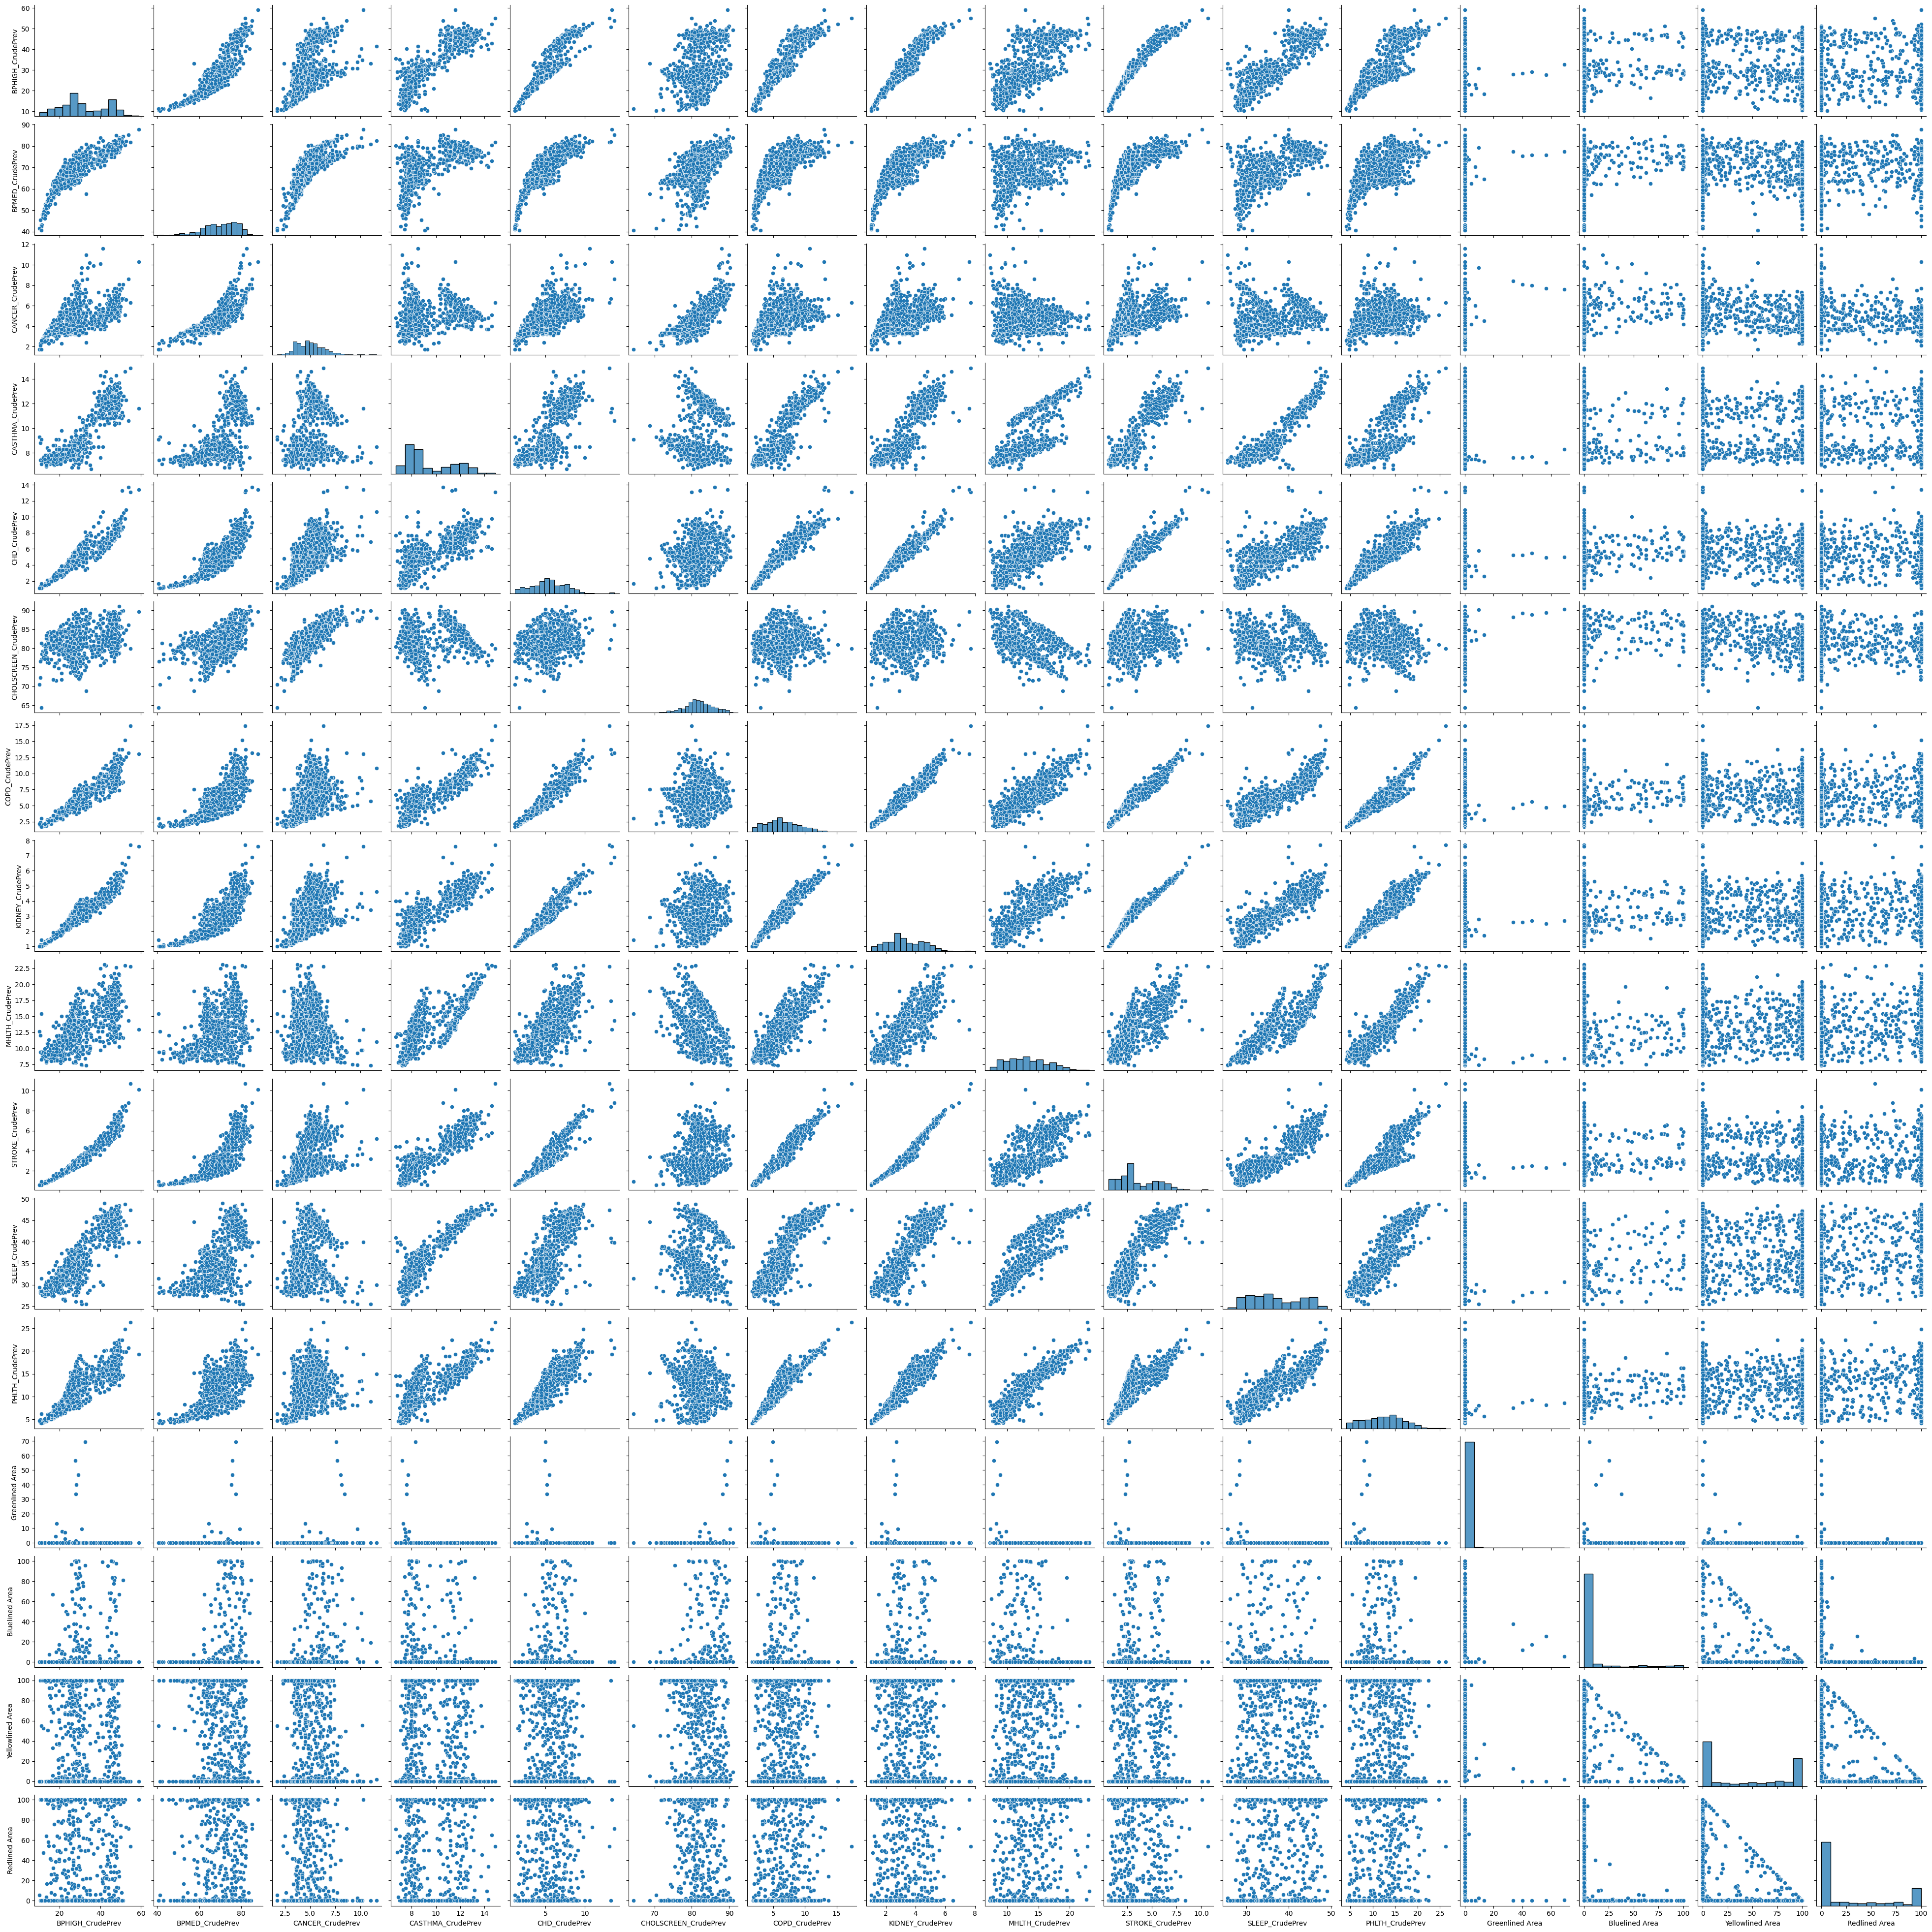

In [ ]:
sns.pairplot(pair_df)

Ridge Regression Analysis for High Blood Pressure

In [ ]:
#Do ridge regression for each of the health factors, using environmental indicators and HOLC Grade Areas as independent variables
#Start with column 2, BPHIGH_CrudePrev
features = df.columns[14:24]
target = df.columns[2]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))


X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


LinearRegression()

The train score for lr model is 0.4702057465337699
The test score for lr model is 0.47344448605757294


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.4702057465301689
The test score for ridge model is 0.47344449988496207


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

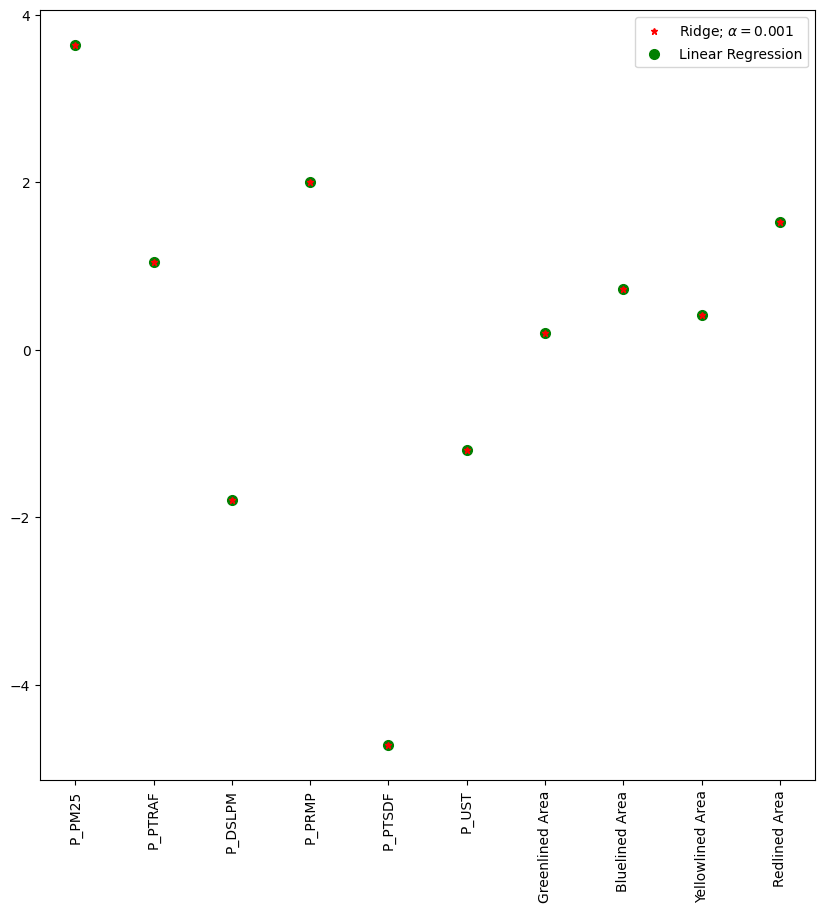

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

Coefficients:
P_PM25: 3.63870397720529
P_PTRAF: 1.0523899906730967
P_DSLPM: -1.7957970786625976
P_PRMP: 2.010591948402832
P_PTSDF: -4.723870050447161
P_UST: -1.1910942207587845
Greenlined Area: 0.20459795782585938
Bluelined Area: 0.7329632464463938
Yellowlined Area: 0.41124646332115905
Redlined Area: 1.5292009893075011


Text(0.5, 0, 'Indepedent Variables Times Coefficients')

Text(0, 0.5, 'High Blood Pressure')

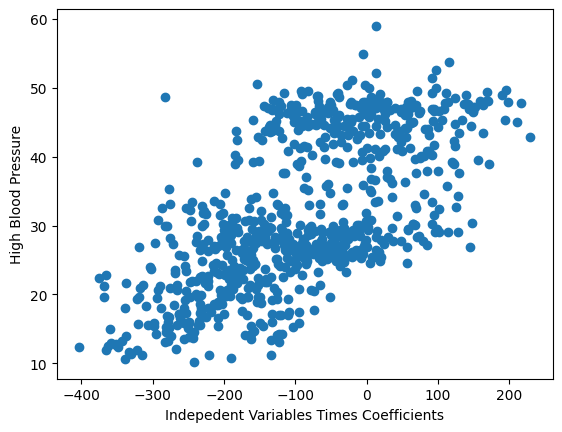

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('High Blood Pressure') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'High Blood Pressure')

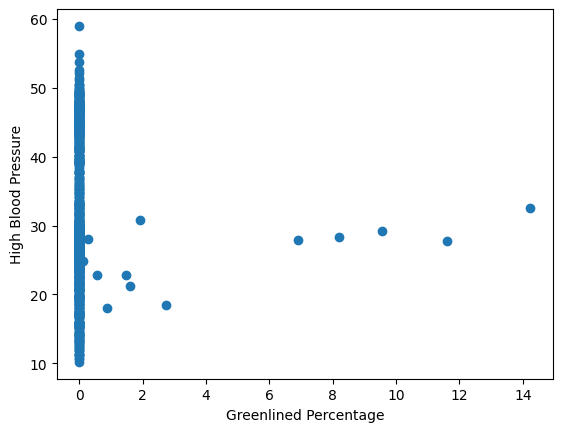

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'High Blood Pressure')

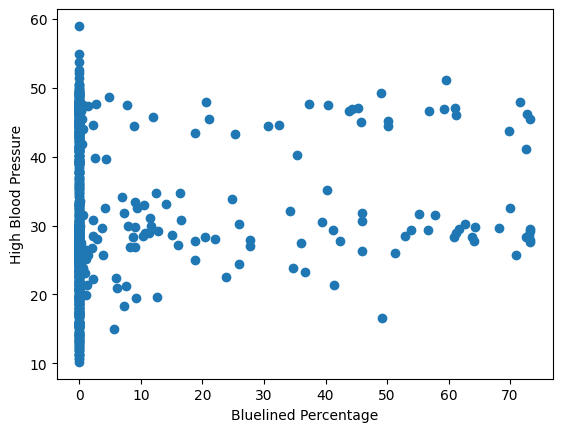

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'High Blood Pressure')

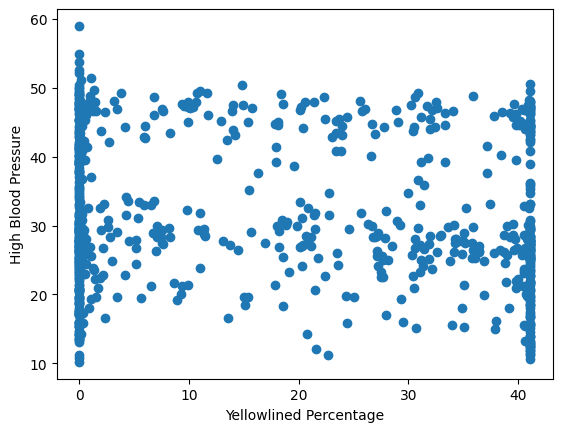

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'High Blood Pressure')

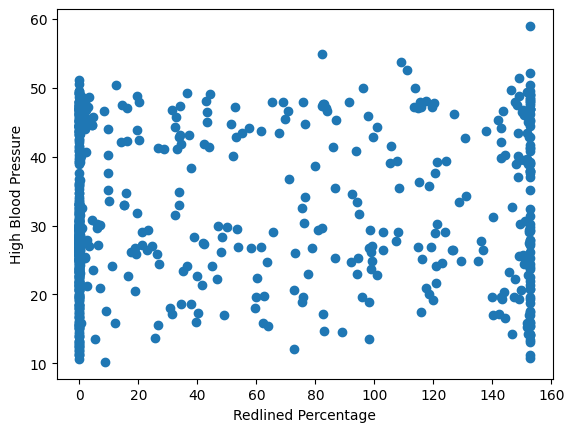

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('High Blood Pressure') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('High Blood Pressure') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('High Blood Pressure') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('High Blood Pressure') 
plt.show()

Ridge Redgression Analysis for Medium Blood Pressure

In [ ]:
features = df.columns[14:24]
target = df.columns[3]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


LinearRegression()

The train score for lr model is 0.41136216678305426
The test score for lr model is 0.4211217306963495


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.991000


Ridge(alpha=0.991)


Ridge Model............................................

The train score for ridge model is 0.4113597997938969
The test score for ridge model is 0.42143664544207227


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

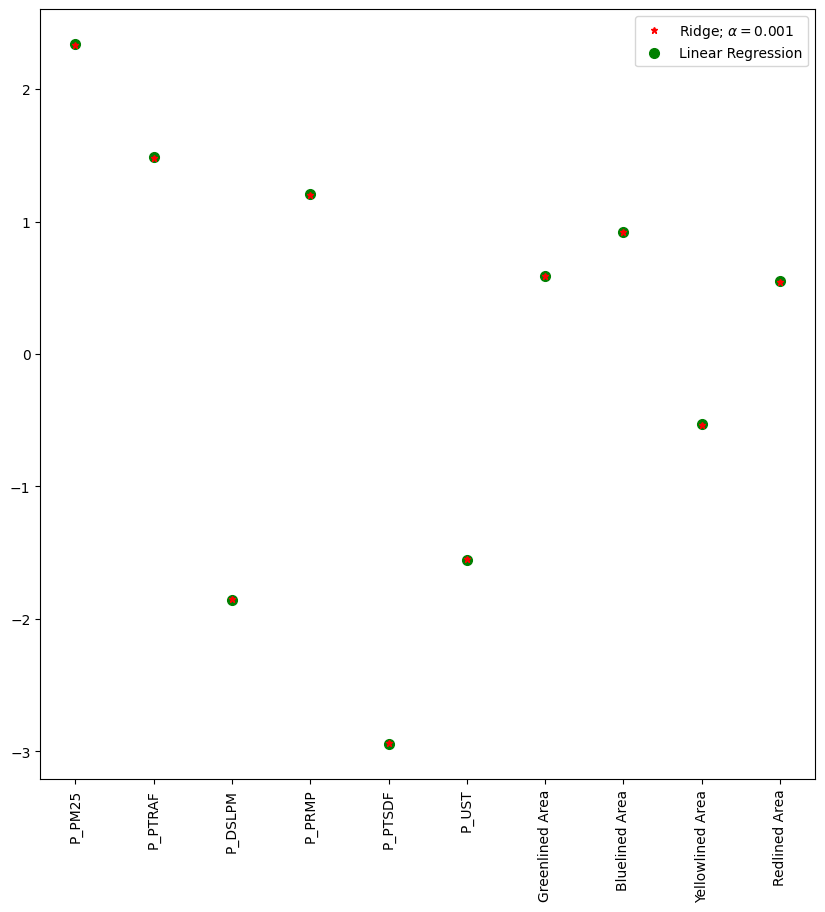

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.991)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

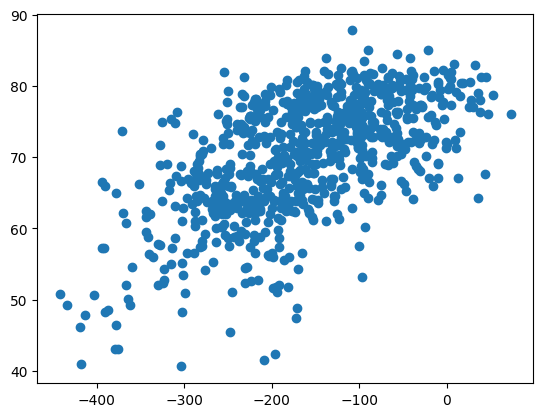

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Medium Blood Pressure') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Med Blood Pressure')

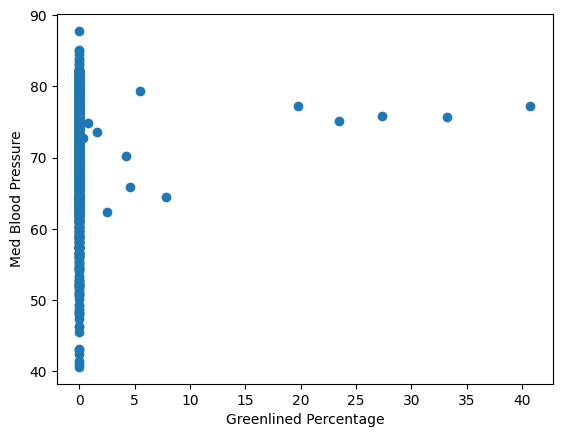

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Med Blood Pressure')

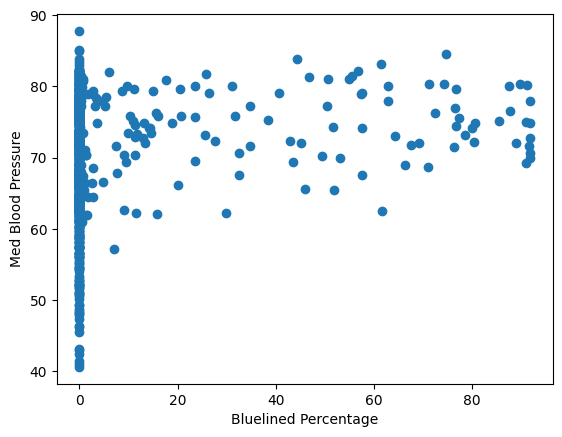

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Med Blood Pressure')

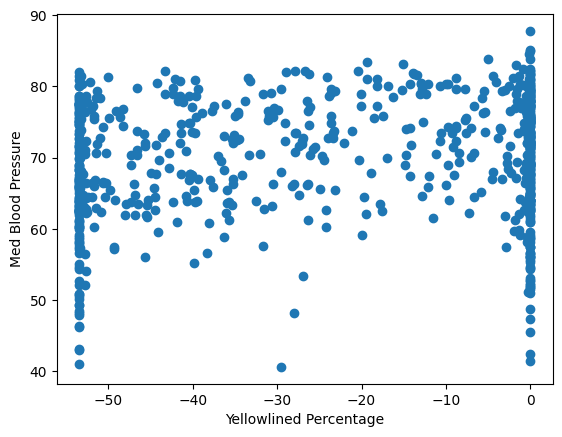

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Med Blood Pressure')

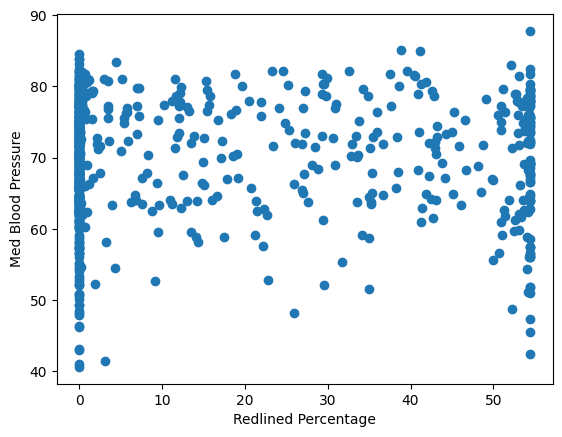

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Med Blood Pressure') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Med Blood Pressure') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Med Blood Pressure') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Med Blood Pressure') 
plt.show()

Ridge Regression Analysis for Cancer

In [ ]:
features = df.columns[14:24]
target = df.columns[4]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


LinearRegression()

The train score for lr model is 0.35137541147005735
The test score for lr model is 0.29968365785257745


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.3513754114676926
The test score for ridge model is 0.29968369175980814


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

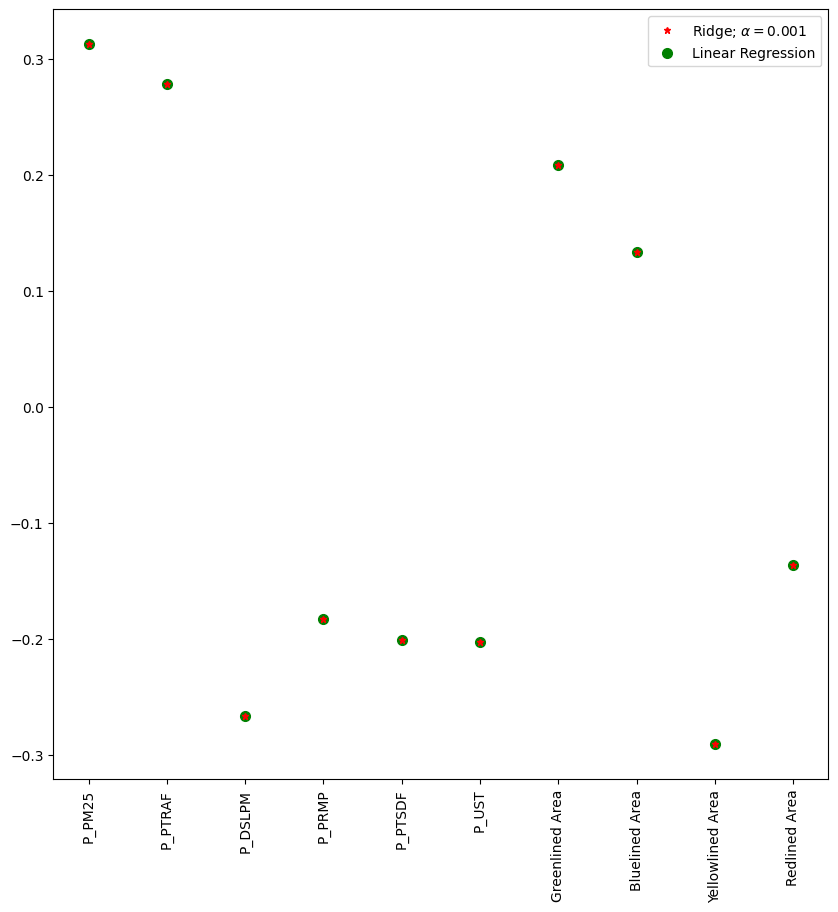

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

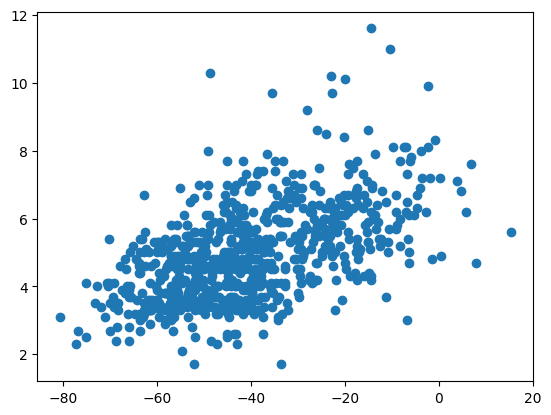

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Cancer') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Cancer')

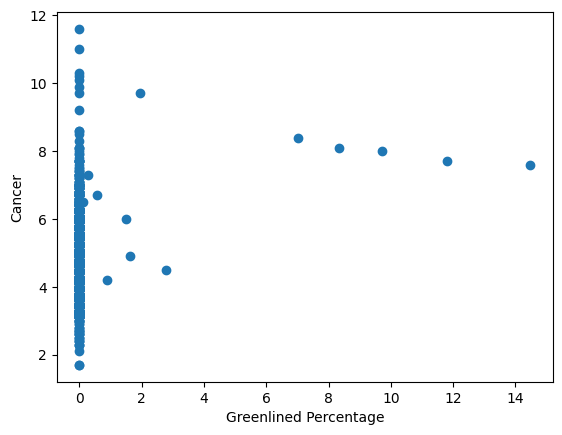

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Cancer')

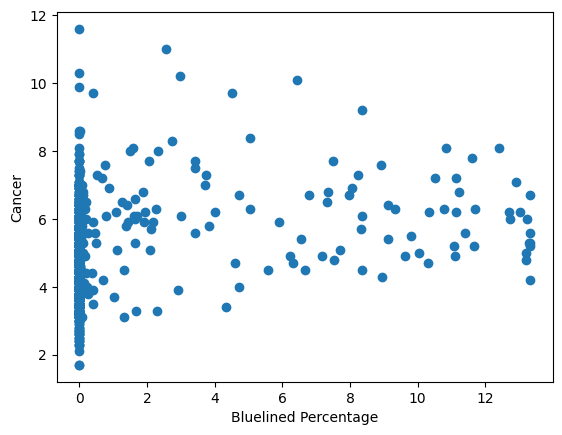

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Cancer')

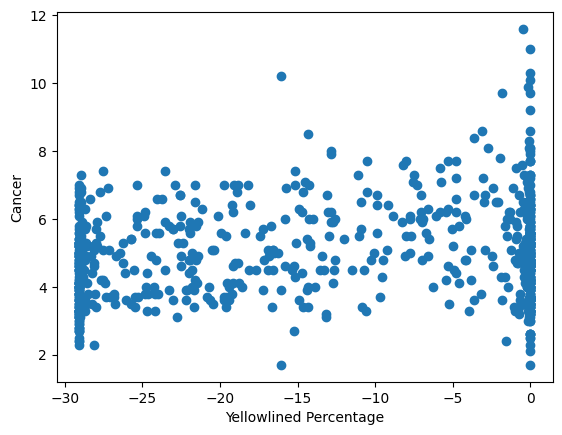

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Cancer')

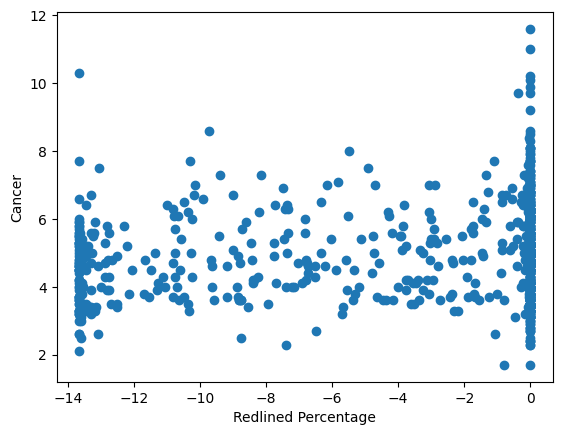

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Cancer') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Cancer') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Cancer') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Cancer') 
plt.show()

Ridge Regression Analysis for Asthma

In [ ]:
features = df.columns[14:24]
target = df.columns[5]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


LinearRegression()

The train score for lr model is 0.350927706716225
The test score for lr model is 0.3560802055863297


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.991000


Ridge(alpha=0.991)


Ridge Model............................................

The train score for ridge model is 0.35092447424620277
The test score for ridge model is 0.3558737848284259


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

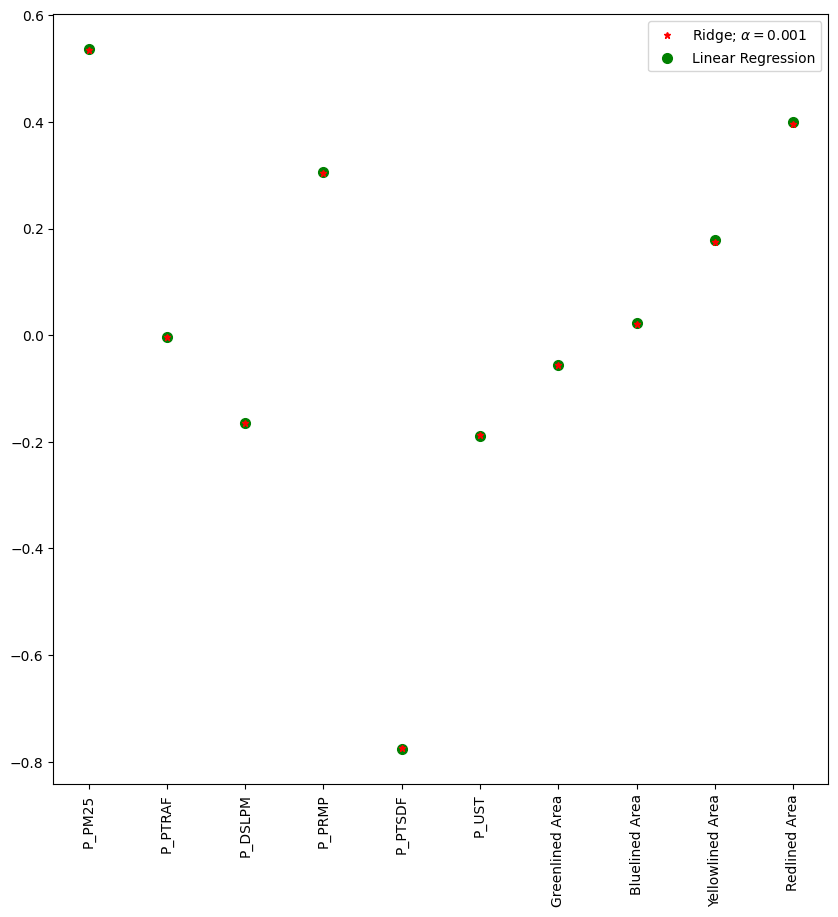

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.991)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

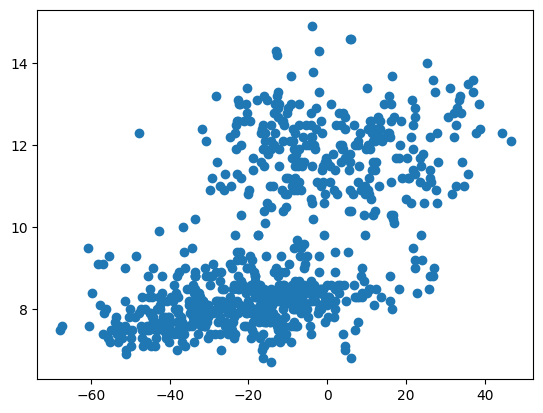

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Asthma') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Asthma')

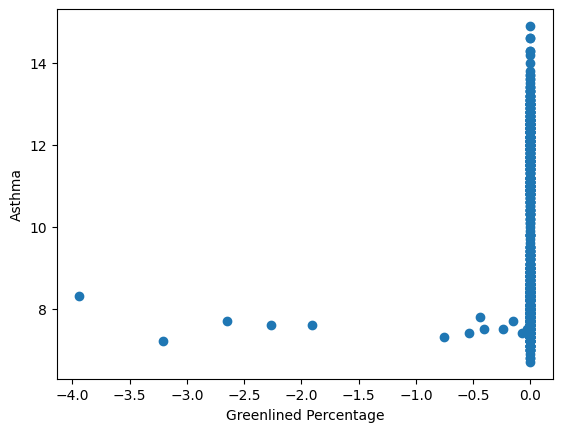

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Asthma')

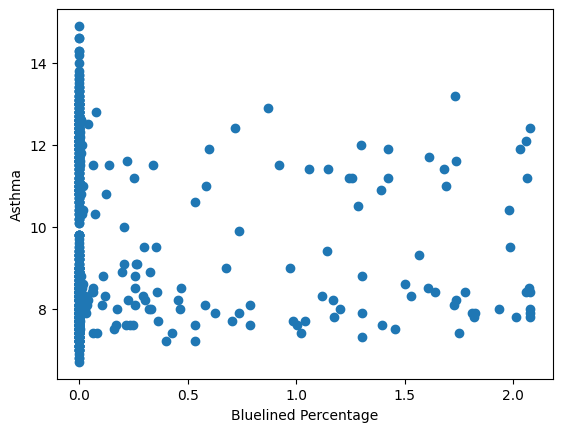

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Asthma')

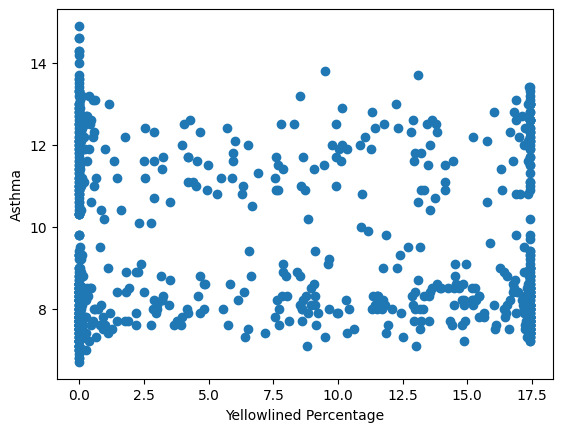

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Asthma')

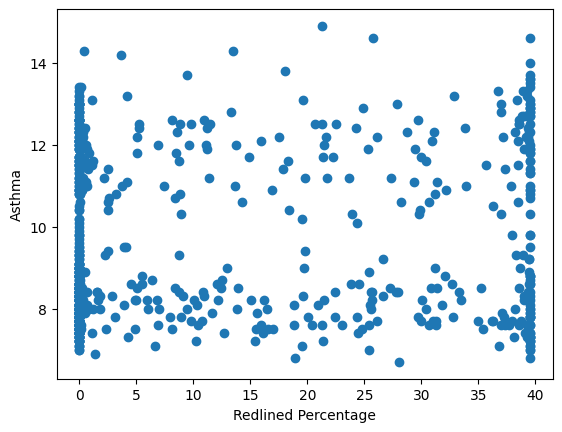

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Asthma') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Asthma') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Asthma') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Asthma') 
plt.show()

Ridge Regression Analysis for Coronary Heart Disease

In [ ]:
features = df.columns[14:24]
target = df.columns[6]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


LinearRegression()

The train score for lr model is 0.43106421185602706
The test score for lr model is 0.4289583480298468


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.43106421185256216
The test score for ridge model is 0.42895844026040786


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

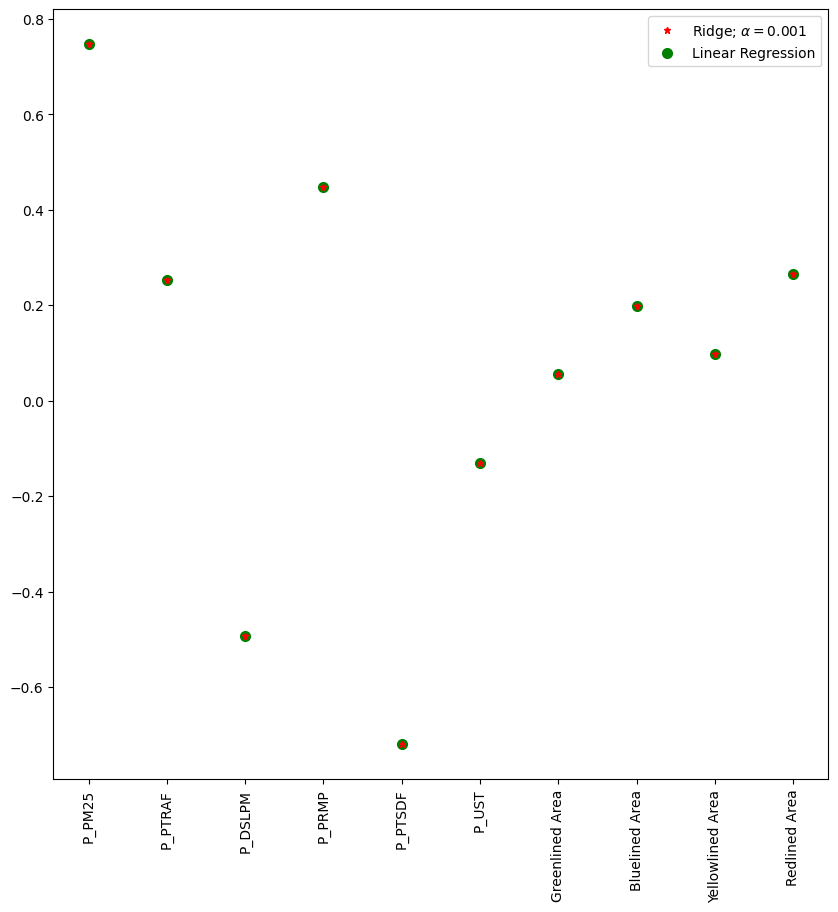

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

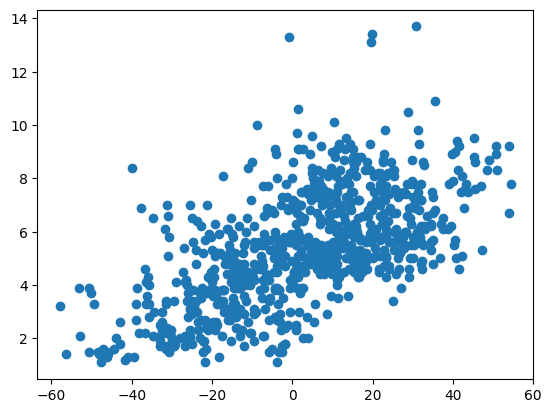

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Coronary Heart Disease') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Coronary Heart Disease')

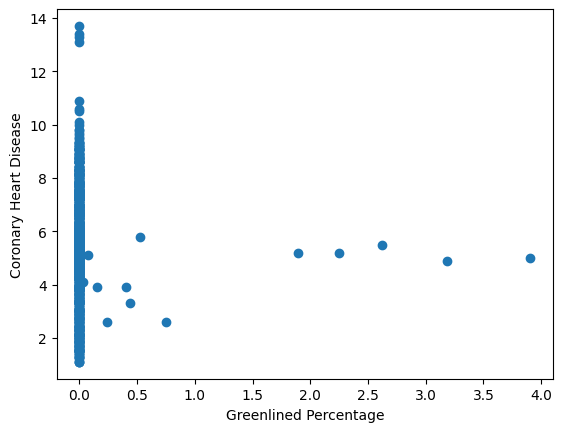

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Coronary Heart Disease')

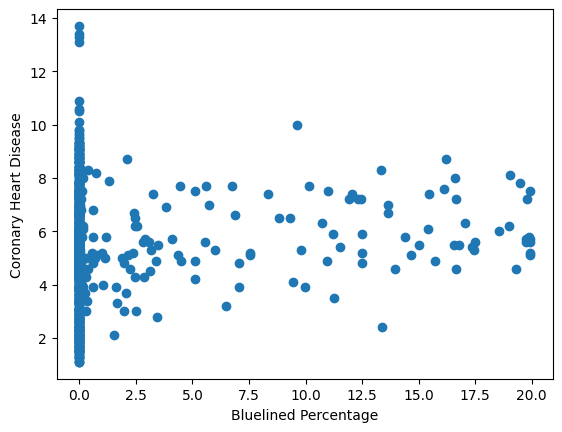

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Coronary Heart Disease')

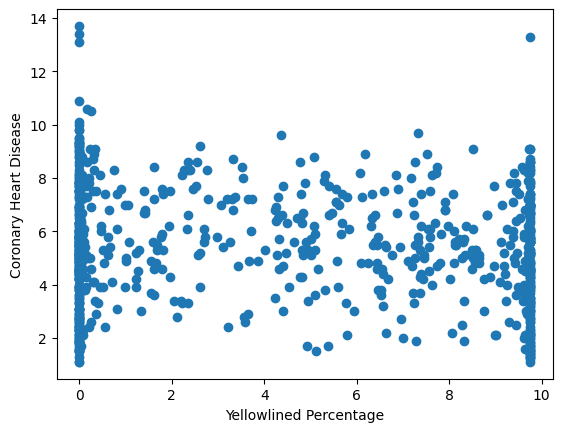

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Coronary Heart Disease')

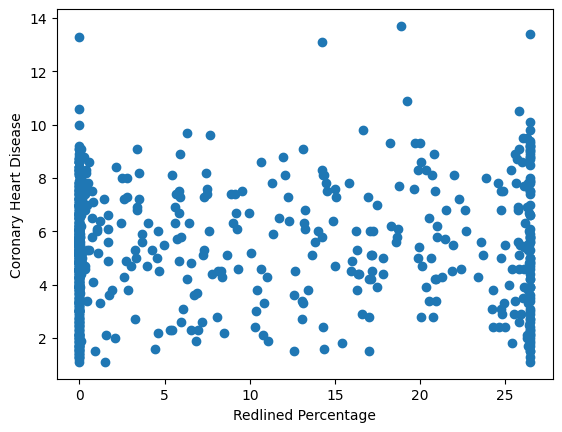

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Coronary Heart Disease') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Coronary Heart Disease') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Coronary Heart Disease') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Coronary Heart Disease') 
plt.show()

Ridge Regression Analysis for Cholesterol Screening

In [ ]:
features = df.columns[14:24]
target = df.columns[7]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.24674894028926697
The test score for lr model is 0.2765088411342186


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.991000


Ridge(alpha=0.991)


Ridge Model............................................

The train score for ridge model is 0.2467467878158165
The test score for ridge model is 0.27660691518938585


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

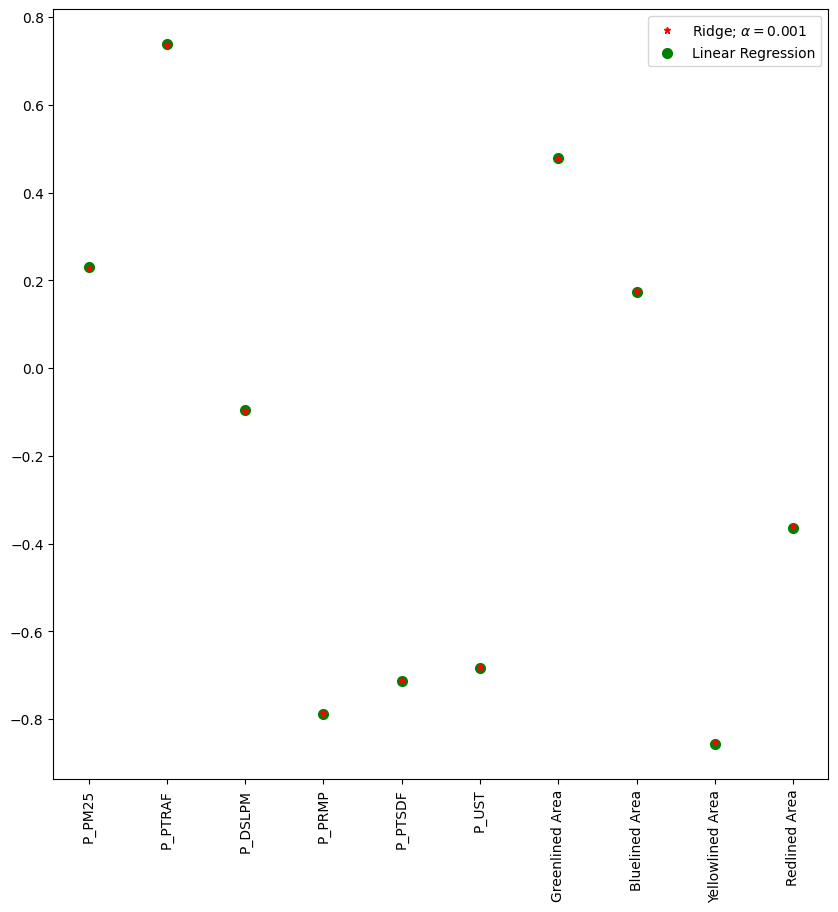

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.991)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

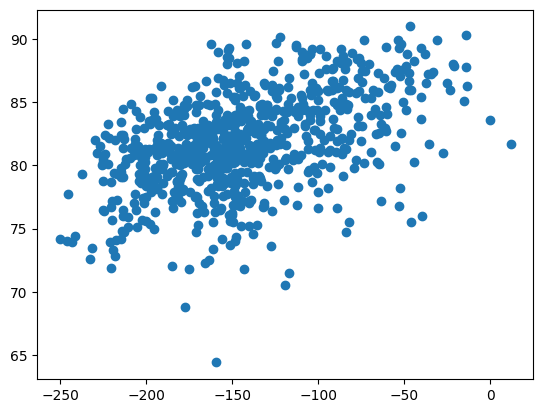

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Cholesterol Screening') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Cholesterol Screening')

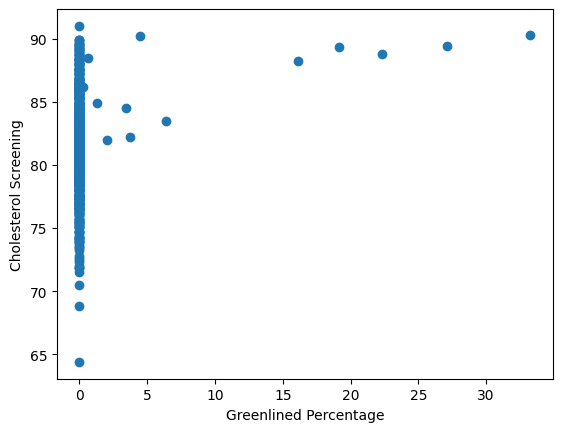

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Cholesterol Screeining')

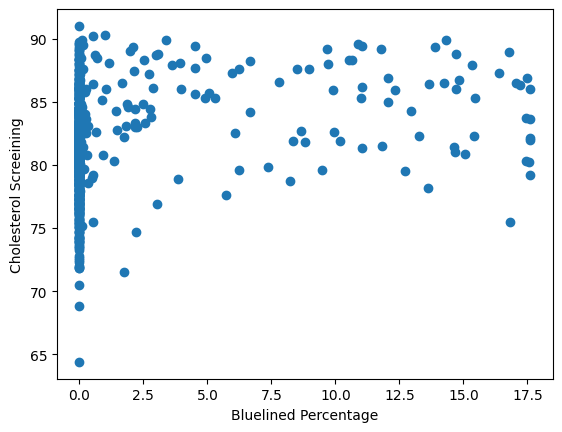

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Cholesterol Screening')

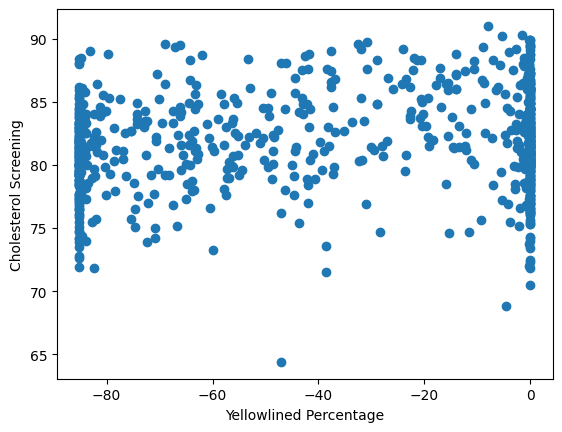

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Cholesterol Screening')

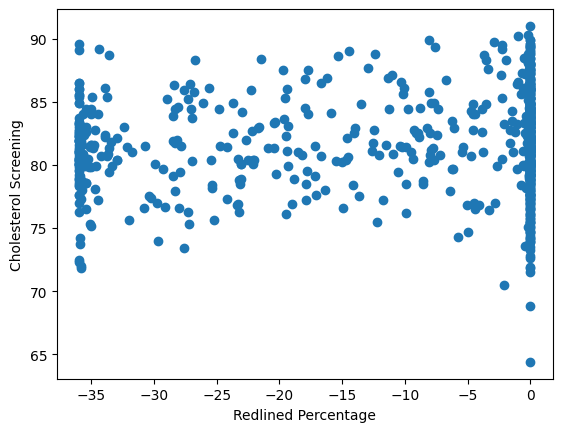

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Cholesterol Screening') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Cholesterol Screeining') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Cholesterol Screening') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Cholesterol Screening') 
plt.show()

Ridge Regression Analysis for Chronic Obstructive Pulmonary Disease

In [ ]:
features = df.columns[14:24]
target = df.columns[8]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.426878107807395
The test score for lr model is 0.44297547124521053


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.42687810780306723
The test score for ridge model is 0.44297547532527404


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

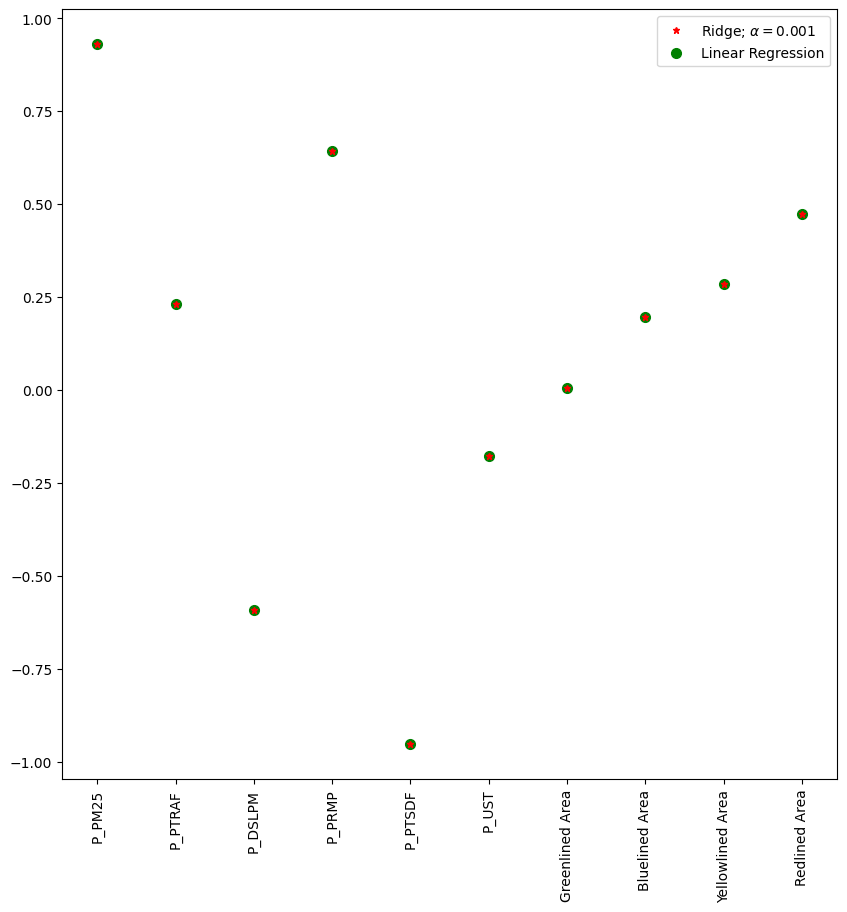

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

Coefficients:
P_PM25: 0.9301576003421913
P_PTRAF: 0.23030099779308816
P_DSLPM: -0.5924760484594964
P_PRMP: 0.6432795445155103
P_PTSDF: -0.9532385679244347
P_UST: -0.17788949482486704
Greenlined Area: 0.005909128595498695
Bluelined Area: 0.19504054870067847
Yellowlined Area: 0.28605994558562586
Redlined Area: 0.47370653967700954


Text(0.5, 0, 'Indepedent Variables Times Coefficients')

Text(0, 0.5, 'Chronic Obstructive Pulmonary Disease')

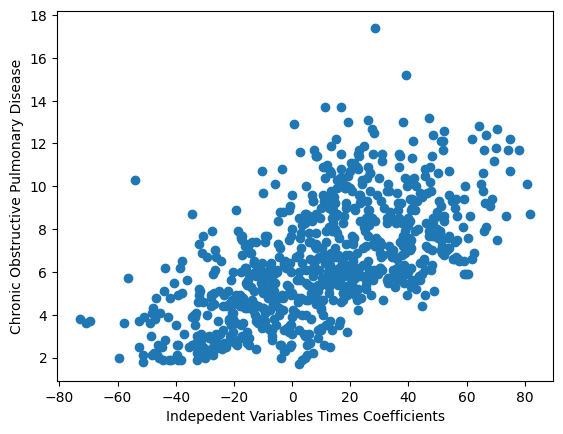

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Chronic Obstructive Pulmonary Disease') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Chronic Obstructive Pulmonary Disease')

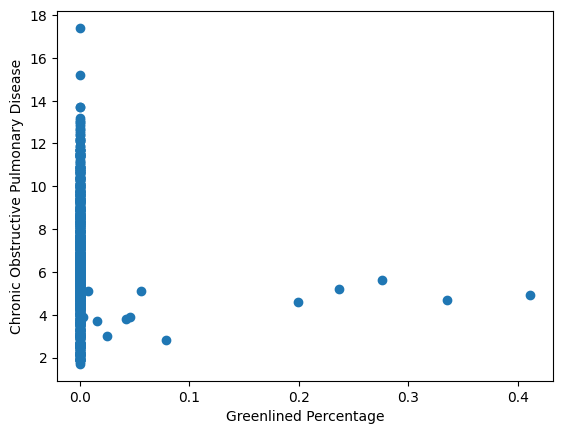

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Chronic Obstructive Pulmonary Disease')

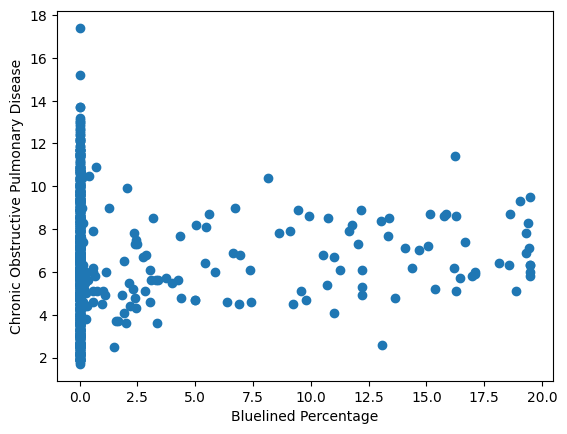

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Chronic Obstructive Pulmonary Disease')

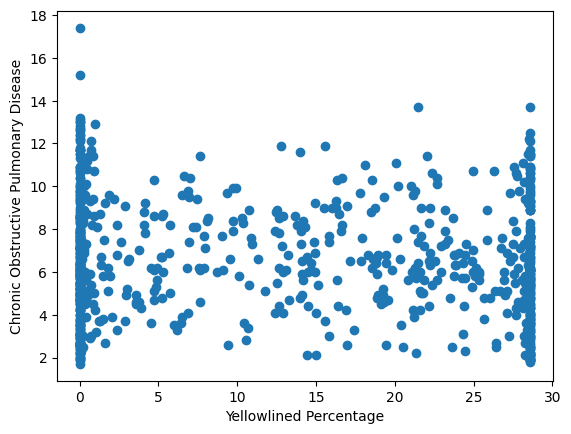

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Chronic Obstructive Pulmonary Disease')

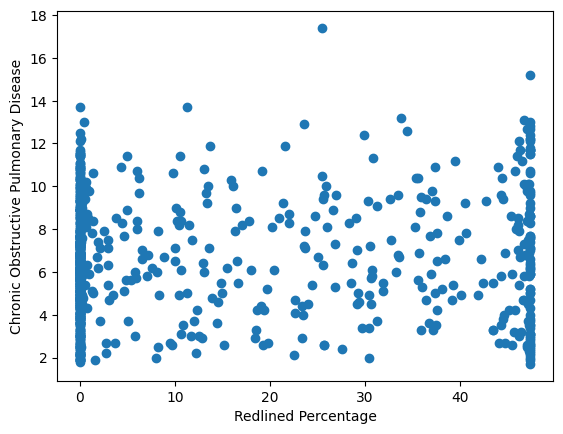

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Chronic Obstructive Pulmonary Disease') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Chronic Obstructive Pulmonary Disease') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Chronic Obstructive Pulmonary Disease') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Chronic Obstructive Pulmonary Disease') 
plt.show()

Ridge Regression Analysis for Chronic Kidney Disease

In [ ]:
features = df.columns[14:24]
target = df.columns[9]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.445510146364159
The test score for lr model is 0.4475699485532608


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.44551014636023967
The test score for ridge model is 0.44756992650933325


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

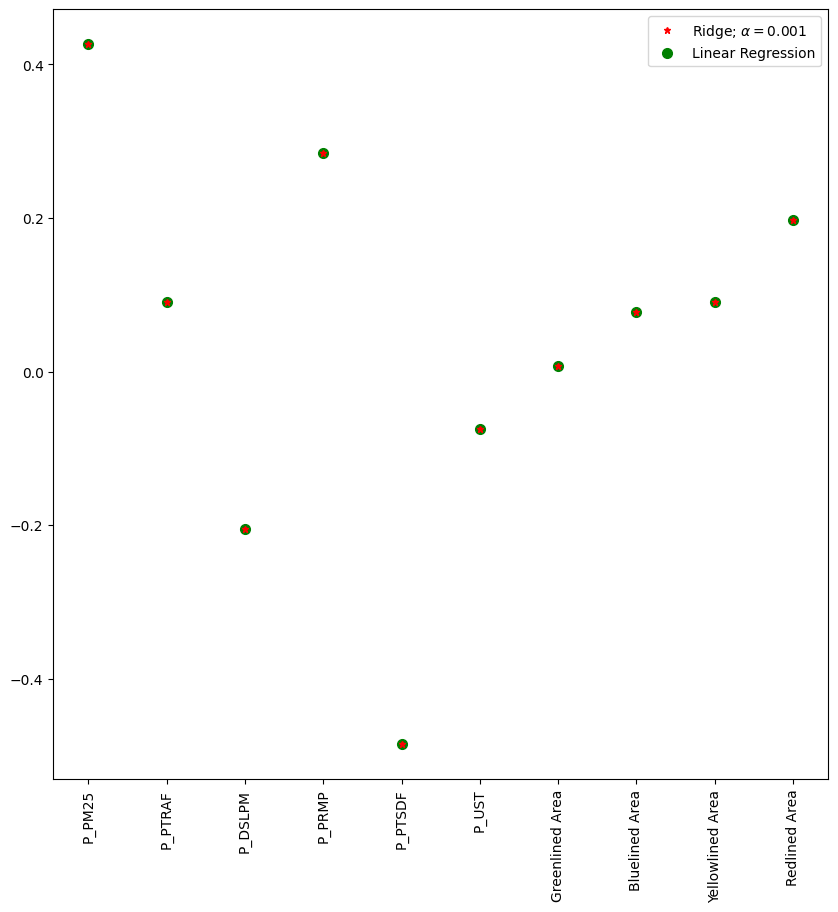

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

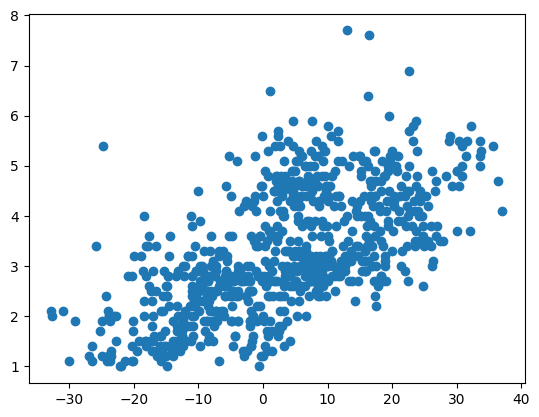

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Chronic Kidney Disease') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Chronic Kidney Disease')

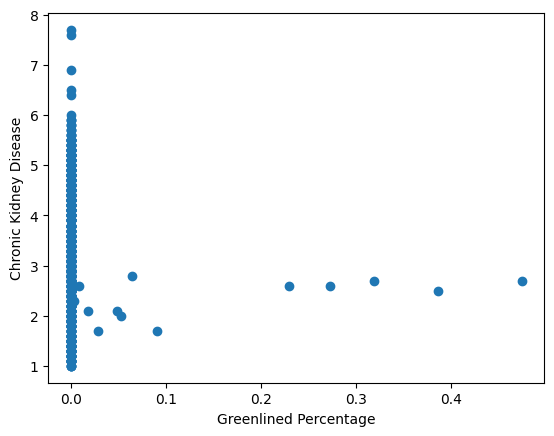

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Chronic Kidney Disease')

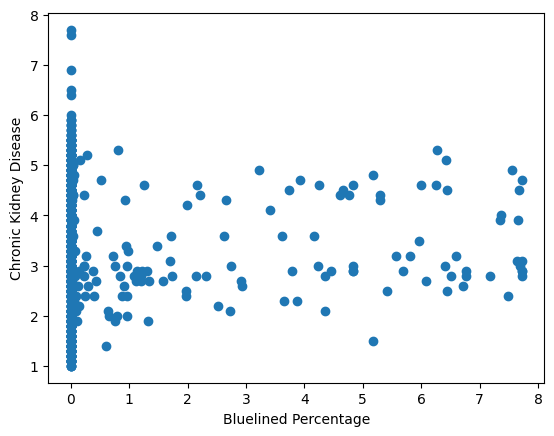

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Chronic Kidney Disease')

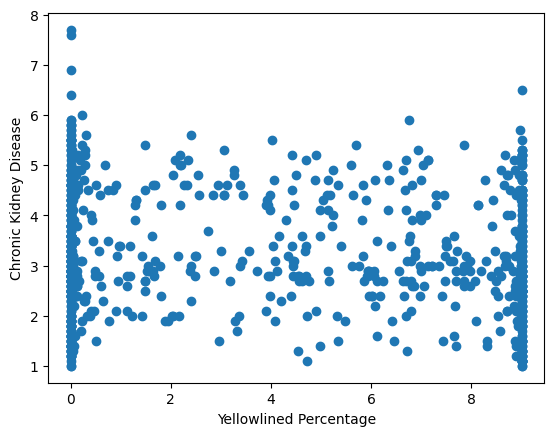

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Chronic Kidney Disease')

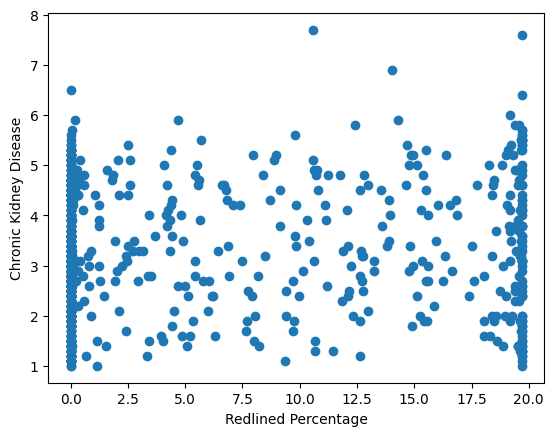

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Chronic Kidney Disease') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Chronic Kidney Disease') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Chronic Kidney Disease') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Chronic Kidney Disease') 
plt.show()

Ridge Regression Analysis for Poor Mental Health





In [ ]:
features = df.columns[14:24]
target = df.columns[10]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.3955160491174897
The test score for lr model is 0.40207438109057414


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.3955160491117279
The test score for ridge model is 0.4020742089296664


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

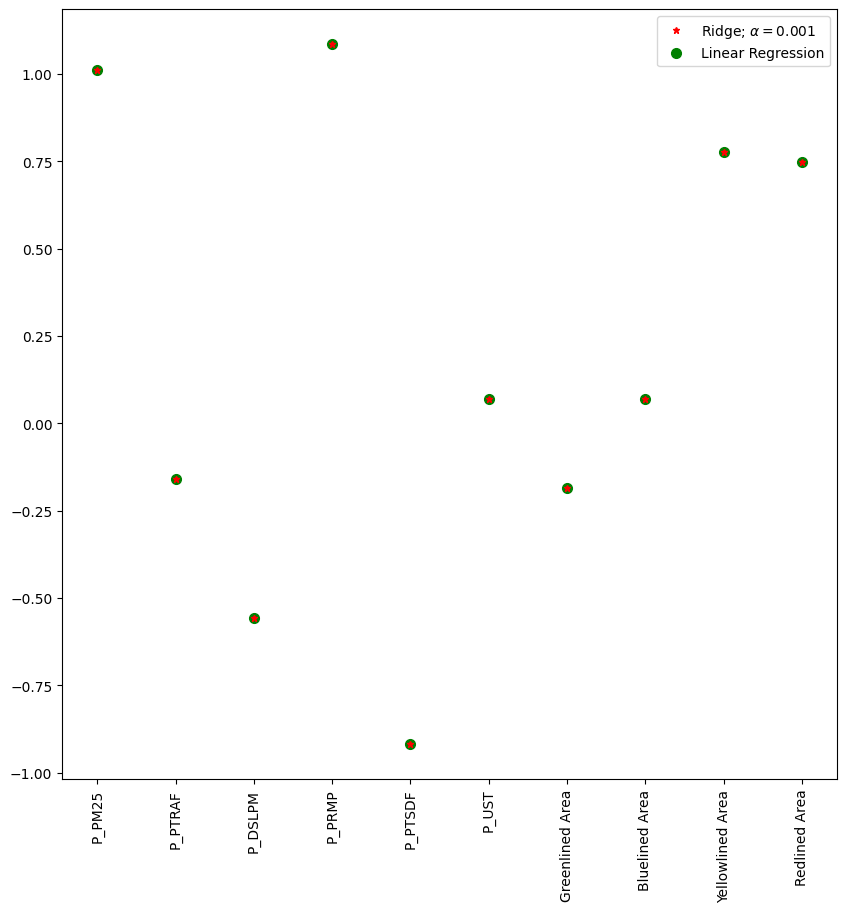

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

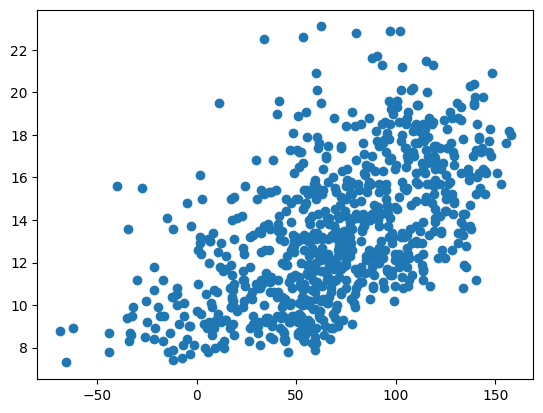

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Poor Mental Health') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Poor Mental Health')

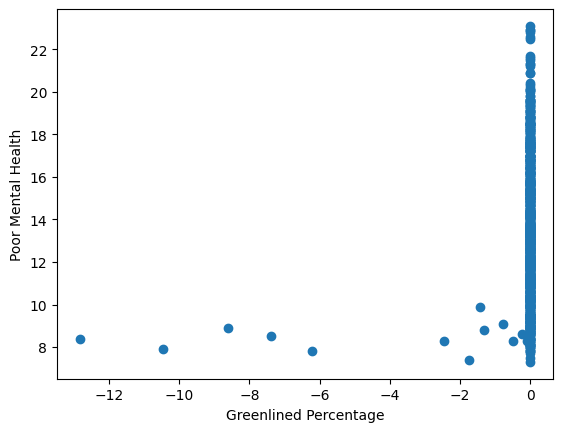

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Poor Mental Health')

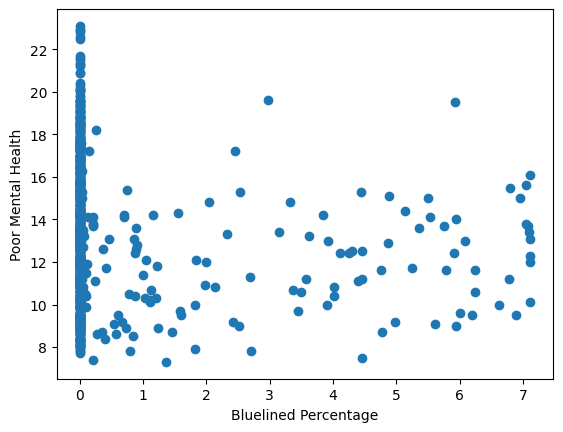

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Poor Mental Health')

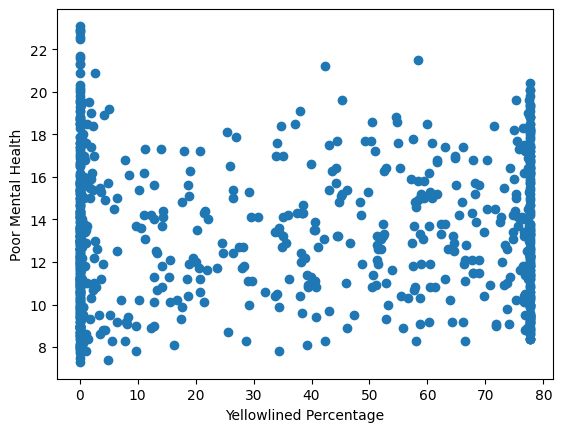

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Poor Mental Health')

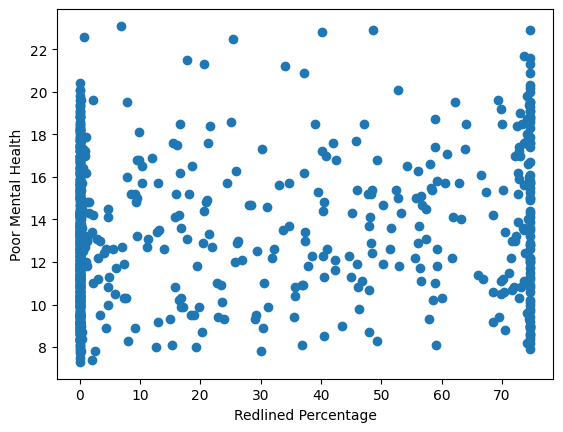

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Poor Mental Health') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Poor Mental Health') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Poor Mental Health') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Poor Mental Health') 
plt.show()

Ridge Regression Analysis for Strokes

In [ ]:
features = df.columns[14:24]
target = df.columns[11]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.4002353155206808
The test score for lr model is 0.4089197321271065


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.4002353155168894
The test score for ridge model is 0.40891965315853296


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

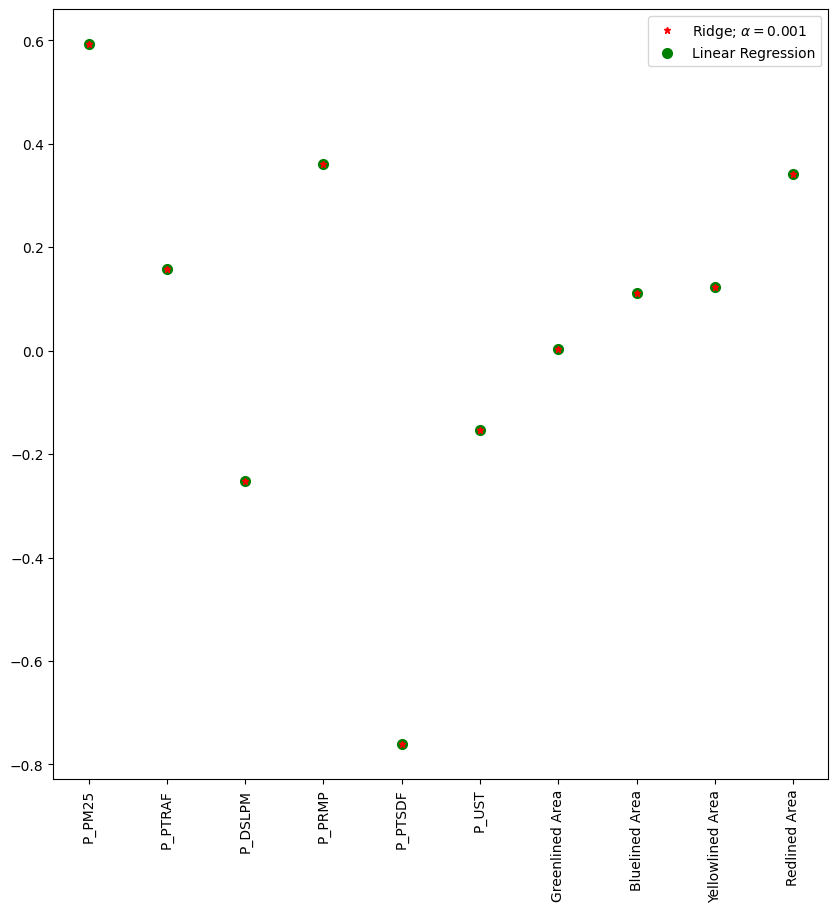

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

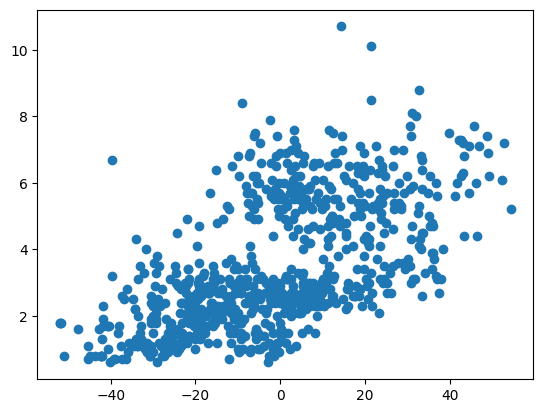

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Strokes') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Strokes')

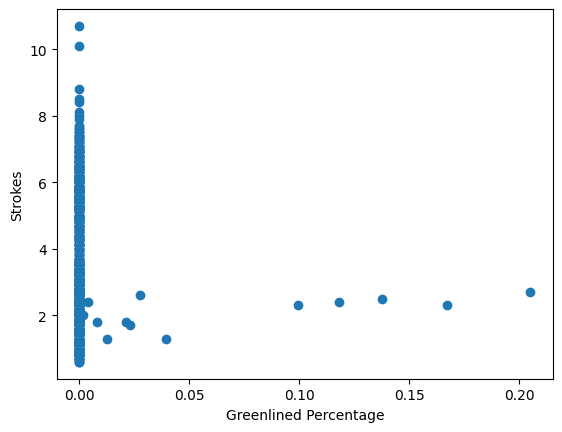

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Strokes')

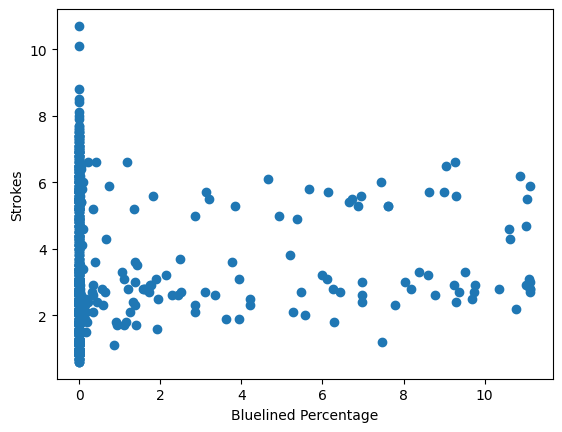

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Strokes')

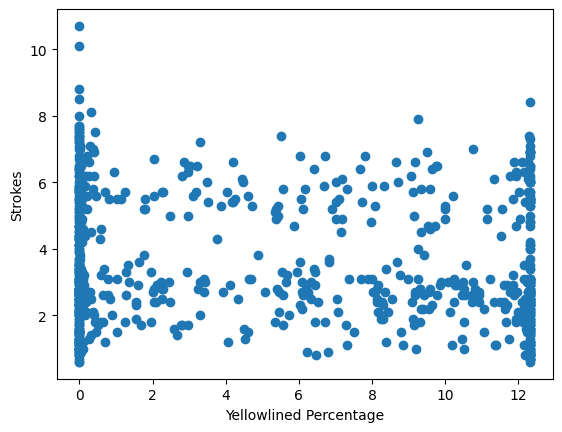

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Strokes')

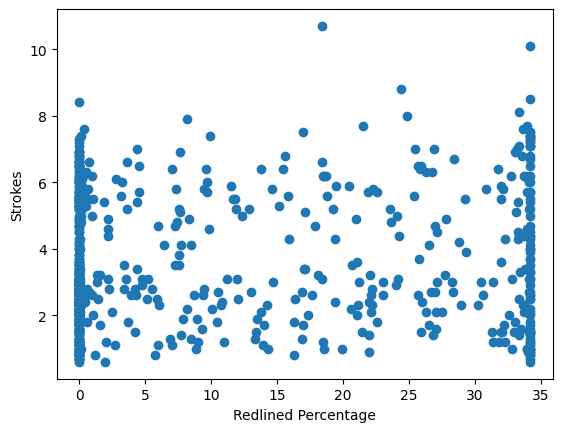

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Strokes') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Strokes') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Strokes') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Strokes') 
plt.show()

Ridge Regression Analysis for Sleep Quality

In [ ]:
features = df.columns[14:24]
target = df.columns[12]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.4572273645620736
The test score for lr model is 0.4213927411982099


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.4572273645564895
The test score for ridge model is 0.42139260205779117


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

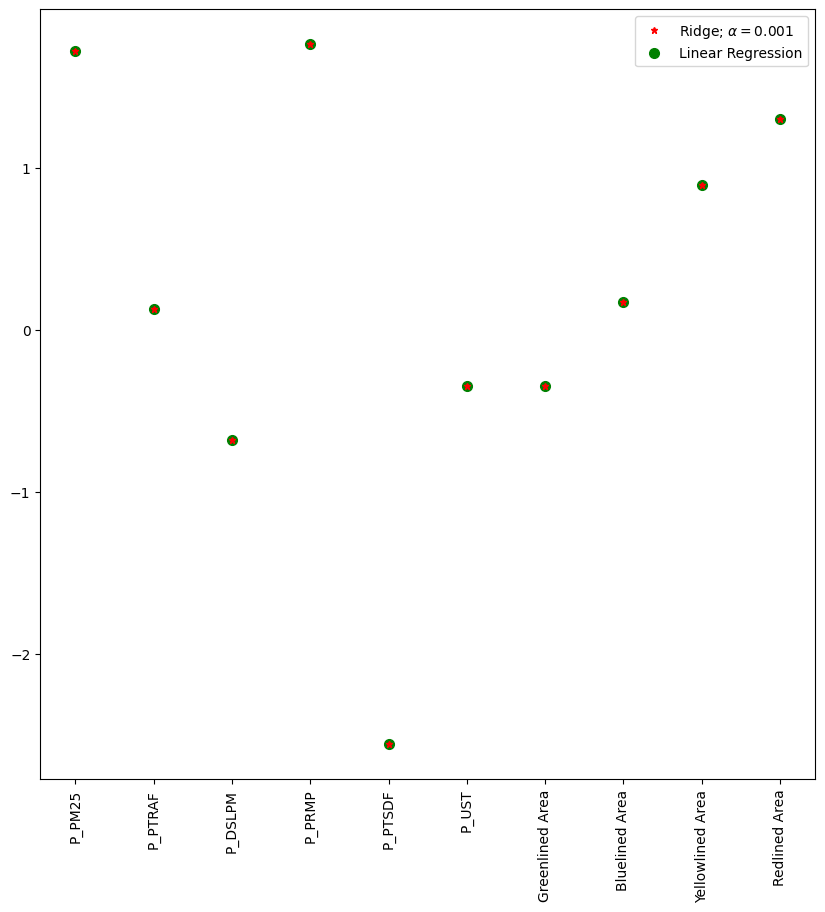

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

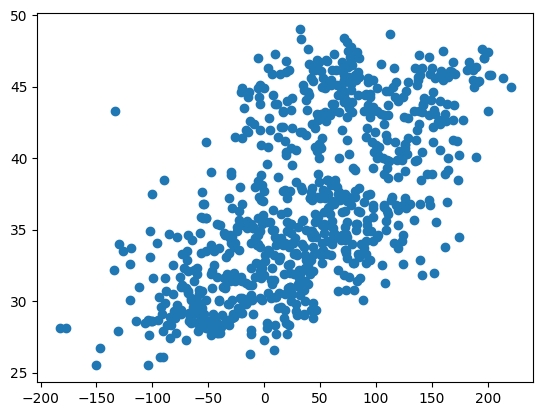

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Sleep Quality') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Sleep Quality')

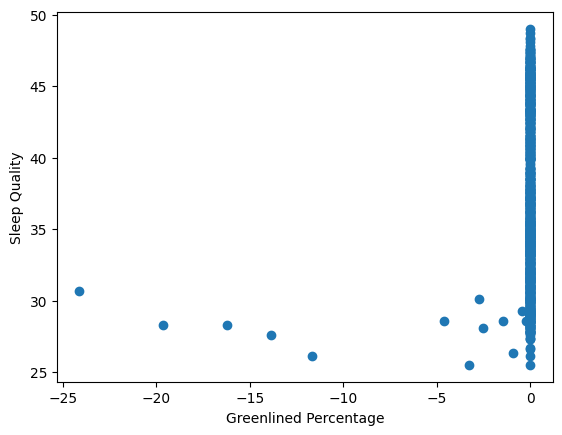

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Sleep Quality')

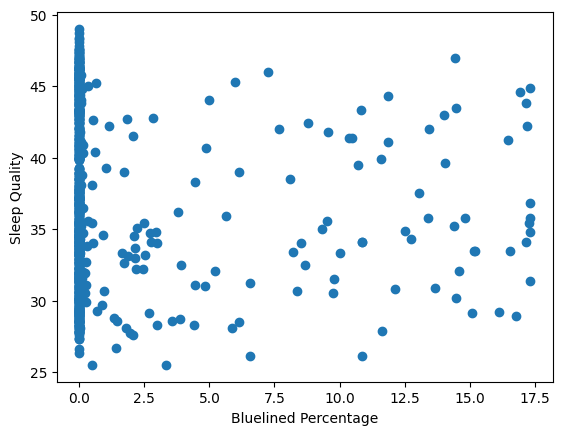

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Sleep Quality')

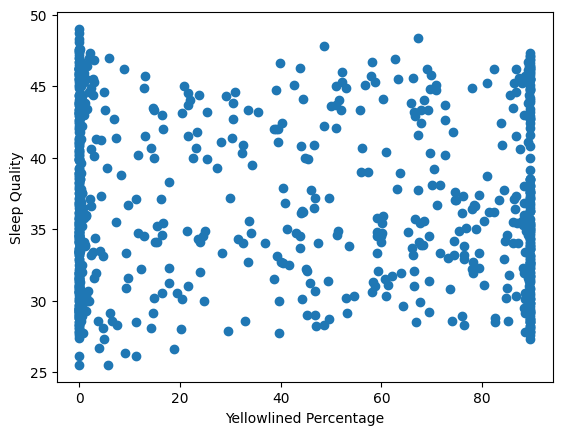

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Sleep Quality')

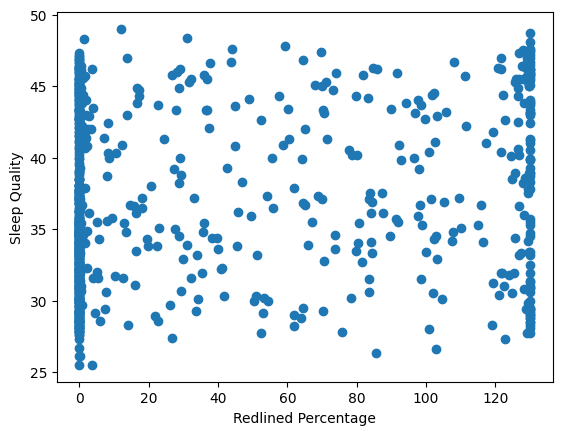

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Sleep Quality') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Sleep Quality') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Sleep Quality') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Sleep Quality') 
plt.show()

Ridge Regression Analysis for Poor Physical Health

In [ ]:
features = df.columns[14:24]
target = df.columns[13]

#X and y values
X = df[features].values
y = df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=17)

print("X_train Dimension: {}".format(X_train.shape))
print("X_test Dimension {}".format(X_test.shape))

X_train Dimension: (397, 10)
X_test Dimension (397, 10)


In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

LinearRegression()

The train score for lr model is 0.4958853070158046
The test score for lr model is 0.4904026532501943


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model()
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.54....571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

alpha: 0.001000


Ridge(alpha=0.001)


Ridge Model............................................

The train score for ridge model is 0.4958853070100193
The test score for ridge model is 0.4904027104898637


<Figure size 1000x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P_PM25'),
  Text(1, 0, 'P_PTRAF'),
  Text(2, 0, 'P_DSLPM'),
  Text(3, 0, 'P_PRMP'),
  Text(4, 0, 'P_PTSDF'),
  Text(5, 0, 'P_UST'),
  Text(6, 0, 'Greenlined Area'),
  Text(7, 0, 'Bluelined Area'),
  Text(8, 0, 'Yellowlined Area'),
  Text(9, 0, 'Redlined Area')])

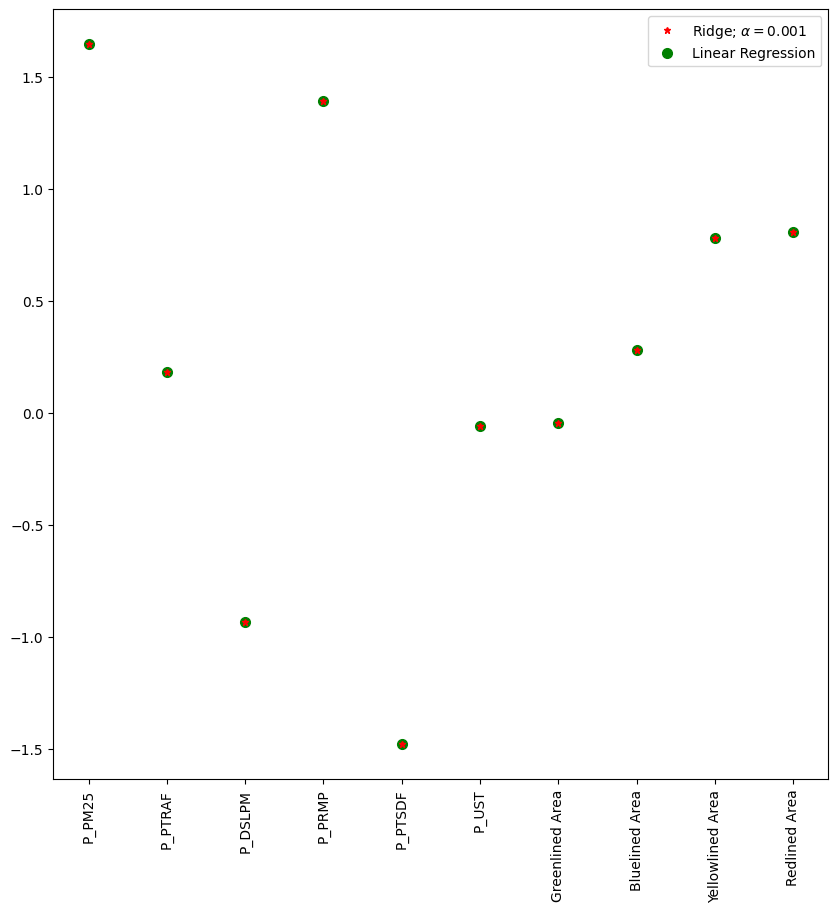

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


#This plots the coefficients calculated by ridge regression
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,lr.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
print('Coefficients:')
print('P_PM25:', ridgeReg.coef_[0])
print('P_PTRAF:',ridgeReg.coef_[1])
print('P_DSLPM:',ridgeReg.coef_[2])
print('P_PRMP:',ridgeReg.coef_[3])
print('P_PTSDF:',ridgeReg.coef_[4]) 
print('P_UST:',ridgeReg.coef_[5])
print('Greenlined Area:', ridgeReg.coef_[6])
print('Bluelined Area:', ridgeReg.coef_[7])
print('Yellowlined Area:', ridgeReg.coef_[8])
print('Redlined Area:', ridgeReg.coef_[9])

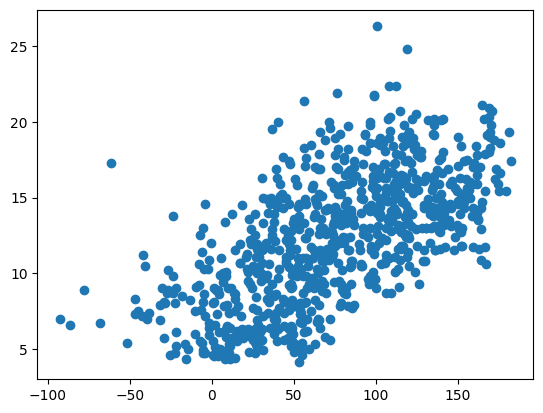

In [ ]:
y = df[target].values
x = ridgeReg.coef_[0]*X[:,0] + ridgeReg.coef_[1]*X[:,1] + ridgeReg.coef_[2]*X[:,2] + ridgeReg.coef_[3]*X[:,3] + ridgeReg.coef_[4]*X[:,4] + ridgeReg.coef_[5]*X[:,5] + ridgeReg.coef_[6]*X[:,6] + ridgeReg.coef_[7]*X[:,7] + ridgeReg.coef_[8]*X[:,8] + ridgeReg.coef_[9]*X[:,9]
plt.scatter(x,y)
plt.xlabel('Indepedent Variables Times Coefficients') 
plt.ylabel('Poor Physical Health') 
plt.show()

Text(0.5, 0, 'Greenlined Percentage')

Text(0, 0.5, 'Poor Physical Health')

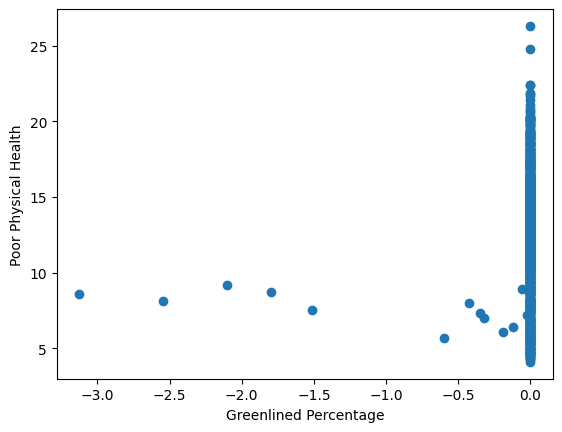

Text(0.5, 0, 'Bluelined Percentage')

Text(0, 0.5, 'Poor Physical Health')

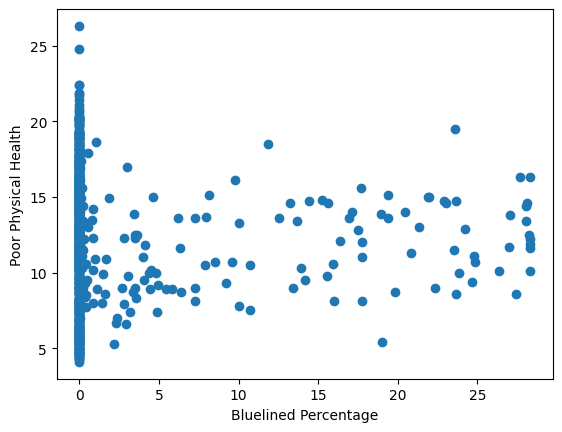

Text(0.5, 0, 'Yellowlined Percentage')

Text(0, 0.5, 'Poor Physical Health')

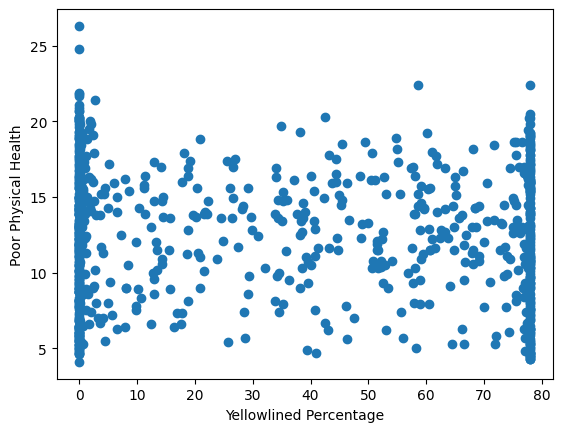

Text(0.5, 0, 'Redlined Percentage')

Text(0, 0.5, 'Poor Physical Health')

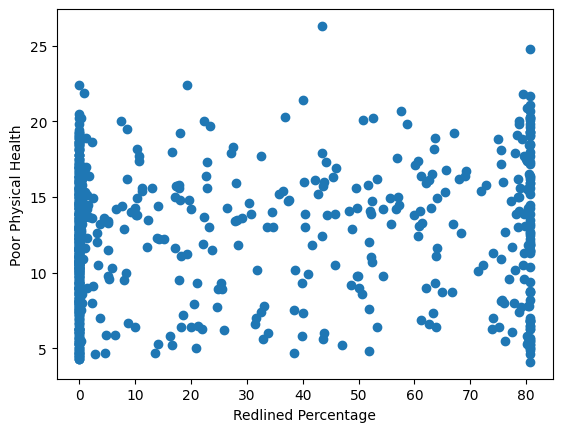

In [ ]:
x1 = ridgeReg.coef_[6]*X[:,6]
plt.scatter(x1,y)
plt.xlabel('Greenlined Percentage') 
plt.ylabel('Poor Physical Health') 
plt.show()
x2 = ridgeReg.coef_[7]*X[:,7]
plt.scatter(x2,y)
plt.xlabel('Bluelined Percentage') 
plt.ylabel('Poor Physical Health') 
plt.show()
x3 = ridgeReg.coef_[8]*X[:,8]
plt.scatter(x3,y)
plt.xlabel('Yellowlined Percentage') 
plt.ylabel('Poor Physical Health') 
plt.show()
x4 = ridgeReg.coef_[9]*X[:,9]
plt.scatter(x4,y)
plt.xlabel('Redlined Percentage') 
plt.ylabel('Poor Physical Health') 
plt.show()